# Data Analysis

In [187]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.head()


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_14764\279034948.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


type  status departure_iataCode departure_icaoCode departure_terminal  \
0  departure  active                lhe               opla                  m   
1  departure  active                lhe               opla                NaN   
2  departure  active                lhe               opla                NaN   
3  departure  active                lhe               opla                  m   
4  departure  active                lhe               opla                  m   

  departure_scheduledTime  departure_estimatedTime departure_actualTime  \
0                20:50:00  2023-07-20t20:00:00.000             20:15:00   
1                15:05:00  2023-07-18t15:05:00.000                  NaN   
2                09:50:00                      NaN                  NaN   
3                23:30:00  2023-07-26t23:30:00.000             23:51:00   
4                11:35:00  2023-07-20t17:15:00.000                  NaN   

  arrival_iataCode arrival_icaoCode arrival_terminal arrival_scheduledTime  \
0              ruh             oerk                4              23:20:00   
1              khi             opkc              NaN              16:50:00   
2              khi             opkc              NaN              11:35:00   
3              kwi             okkk              NaN              01:30:00   
4              dxb             omdb                1              14:00:00   

  arrival_estimatedTime                     airline_name airline_iataCode  \
0              21:54:00                           saudia               sv   
1                   NaN                        flyjinnah               9p   
2                   NaN                        flyjinnah               9p   
3              01:24:00  pakistan international airlines               pk   
4                   NaN                       serene air               er   

  airline_icaoCode  flight_number flight_iataNumber flight_icaoNumber  \
0              sva            737             sv737            sva737   
1              fjl            843             9p843            fjl843   
2              fjl            841             9p841            fjl841   
3              pia            205             pk205            pia205   
4              sep            723             er723            sep723   

  arrival_baggage codeshared_airline_name codeshared_airline_iataCode  \
0             NaN                     NaN                         NaN   
1             NaN                     NaN                         NaN   
2             NaN                     NaN                         NaN   
3             NaN                     NaN                         NaN   
4              03                     NaN                         NaN   

  codeshared_airline_icaoCode  codeshared_flight_number  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

  codeshared_flight_iataNumber codeshared_flight_icaoNumber arrival_gate  \
0                          NaN                          NaN          NaN   
1                          NaN                          NaN          NaN   
2                          NaN                          NaN          NaN   
3                          NaN                          NaN          NaN   
4                          NaN                          NaN          NaN   

  departure_gate arrival_actualTime departure_scheduledDate  \
0            NaN                NaN              2023-07-20   
1            NaN                NaN              2023-07-18   
2            NaN                NaN              2023-07-23   
3            NaN                NaN              2023-07-26   
4            NaN                NaN              2023-07-20   

  departure_actualDate departure_estimatedRunwayDate  \
0           2

In [188]:

print( len(df) )

nulls = df.isnull().sum()
nulls_percentage = (df.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)



51572


Missing Values  Percentage Missing
arrival_actualRunwayDate                51320           99.511363
arrival_estimatedRunwayTime             51320           99.511363
arrival_actualTime                      51320           99.511363
arrival_actualRunwayTime                51320           99.511363
arrival_estimatedRunwayDate             51320           99.511363
departure_gate                          48038           93.147444
arrival_gate                            48012           93.097029
codeshared_flight_number                35689           69.202280
codeshared_airline_name                 35689           69.202280
codeshared_airline_icaoCode             35689           69.202280
codeshared_airline_iataCode             35689           69.202280
codeshared_flight_iataNumber            35689           69.202280
codeshared_flight_icaoNumber            35689           69.202280
arrival_baggage                         33454           64.868533
arrival_terminal                        31007           60.123711
departure_terminal                      21750           42.174048
arrival_estimatedTime                   21364           41.425580
arrival_estimatedDate                   21364           41.425580
departure_actualTime                    20582           39.909253
departure_estimatedRunwayDate           20582           39.909253
departure_actualRunwayTime              20582           39.909253
departure_estimatedRunwayTime           20582           39.909253
departure_actualDate                    20582           39.909253
departure_actualRunwayDate              20582           39.909253
departure_estimatedTime                  7007           13.586830
airline_iataCode                           29            0.056232
flight_iataNumber                          29            0.056232

In [189]:

df.columns


Index(['type', 'status', 'departure_iataCode', 'departure_icaoCode',
       'departure_terminal', 'departure_scheduledTime',
       'departure_estimatedTime', 'departure_actualTime', 'arrival_iataCode',
       'arrival_icaoCode', 'arrival_terminal', 'arrival_scheduledTime',
       'arrival_estimatedTime', 'airline_name', 'airline_iataCode',
       'airline_icaoCode', 'flight_number', 'flight_iataNumber',
       'flight_icaoNumber', 'arrival_baggage', 'codeshared_airline_name',
       'codeshared_airline_iataCode', 'codeshared_airline_icaoCode',
       'codeshared_flight_number', 'codeshared_flight_iataNumber',
       'codeshared_flight_icaoNumber', 'arrival_gate', 'departure_gate',
       'arrival_actualTime', 'departure_scheduledDate', 'departure_actualDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'arrival_estimatedRunwayD

In [190]:

df = df.drop( columns=[ 'departure_gate', 'arrival_gate' ])


## Important weather features

In [191]:

# Columns of interest
columns_to_correlate = [
    'Temperature (°F)_Avg', 'Temperature (°F)_Min', 'Temperature (°F)_Max',
    'Dew Point (°F)_Avg', 'Dew Point (°F)_Min', 'Dew Point (°F)_Max',
    'Humidity (%)_Avg', 'Humidity (%)_Min', 'Humidity (%)_Max',
    'Wind Speed (mph)_Avg', 'Wind Speed (mph)_Min', 'Wind Speed (mph)_Max',
    'Pressure (in)_Avg', 'Pressure (in)_Min', 'Pressure (in)_Max',
    'Precipitation (in)_Total'
]

for col in columns_to_correlate:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Temperature (°F)_Avg        227.743191
Temperature (°F)_Min        307.093761
Temperature (°F)_Max        244.795429
Dew Point (°F)_Avg          141.100361
Dew Point (°F)_Min          228.384615
Dew Point (°F)_Max          131.563623
Humidity (%)_Avg            264.497295
Humidity (%)_Min            340.726246
Humidity (%)_Max            205.505973
Wind Speed (mph)_Avg         14.463189
Wind Speed (mph)_Min          2.105594
Wind Speed (mph)_Max        163.151928
Pressure (in)_Avg             0.131444
Pressure (in)_Min            64.018397
Pressure (in)_Max             0.049898
Precipitation (in)_Total      0.000000
dtype: float64


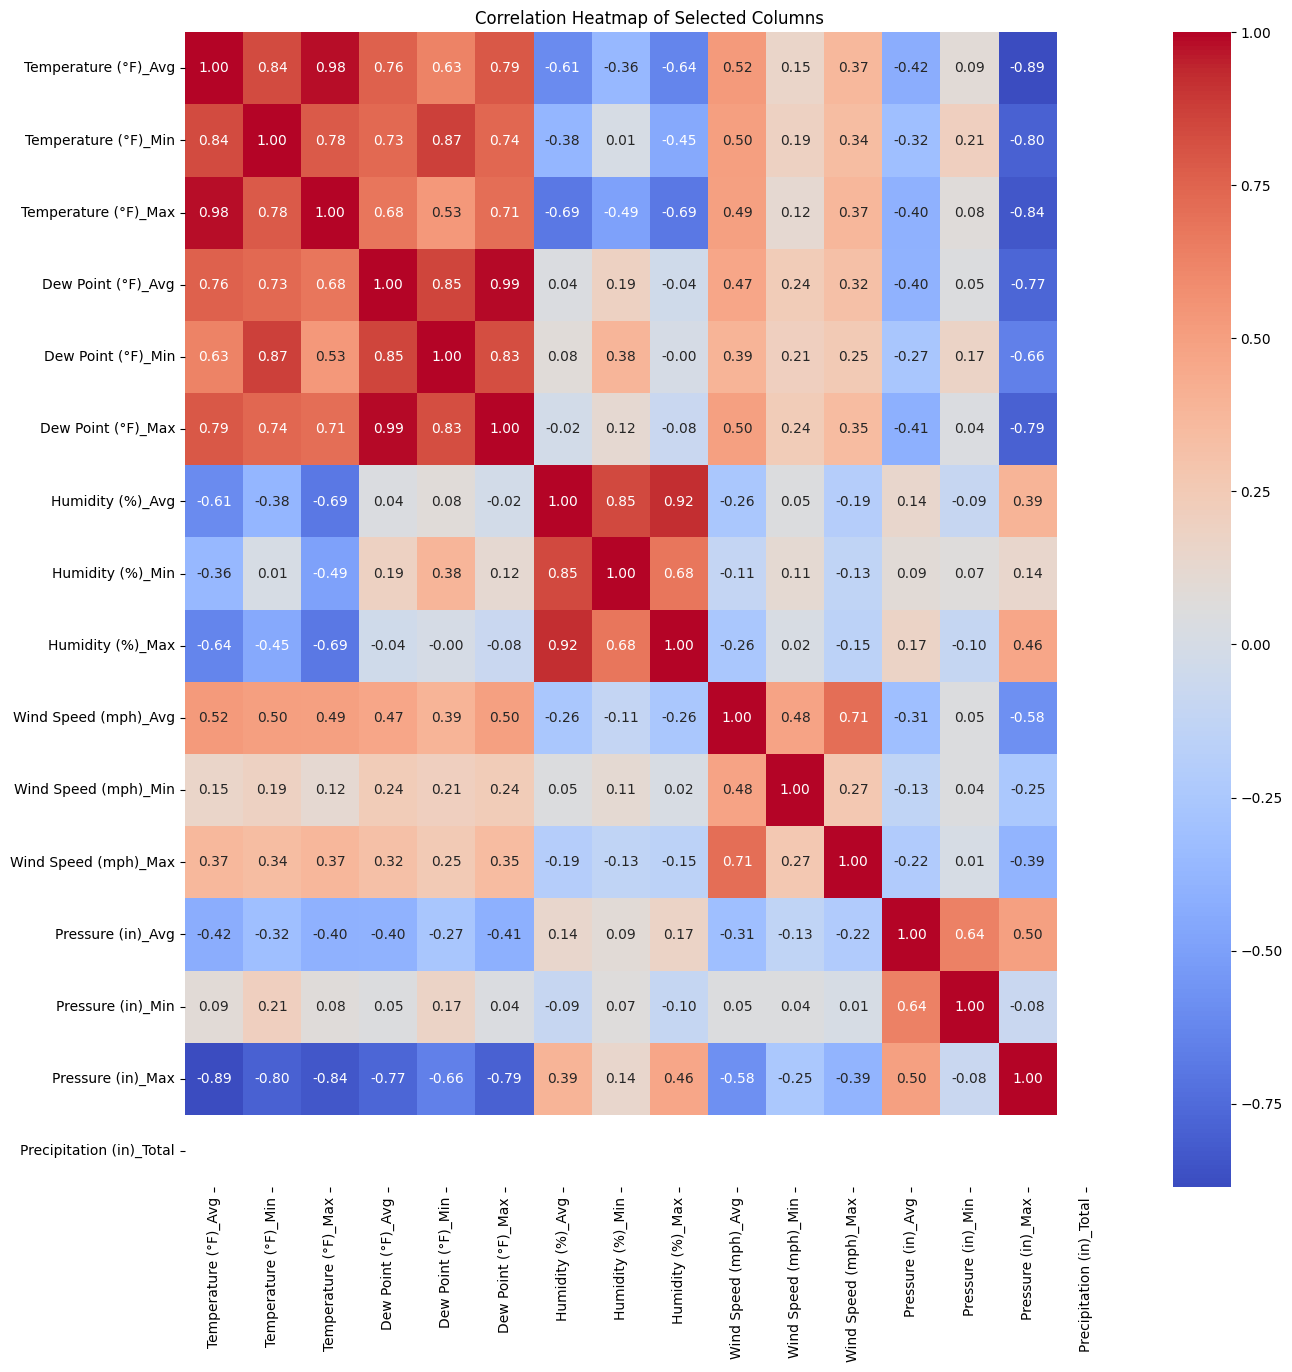

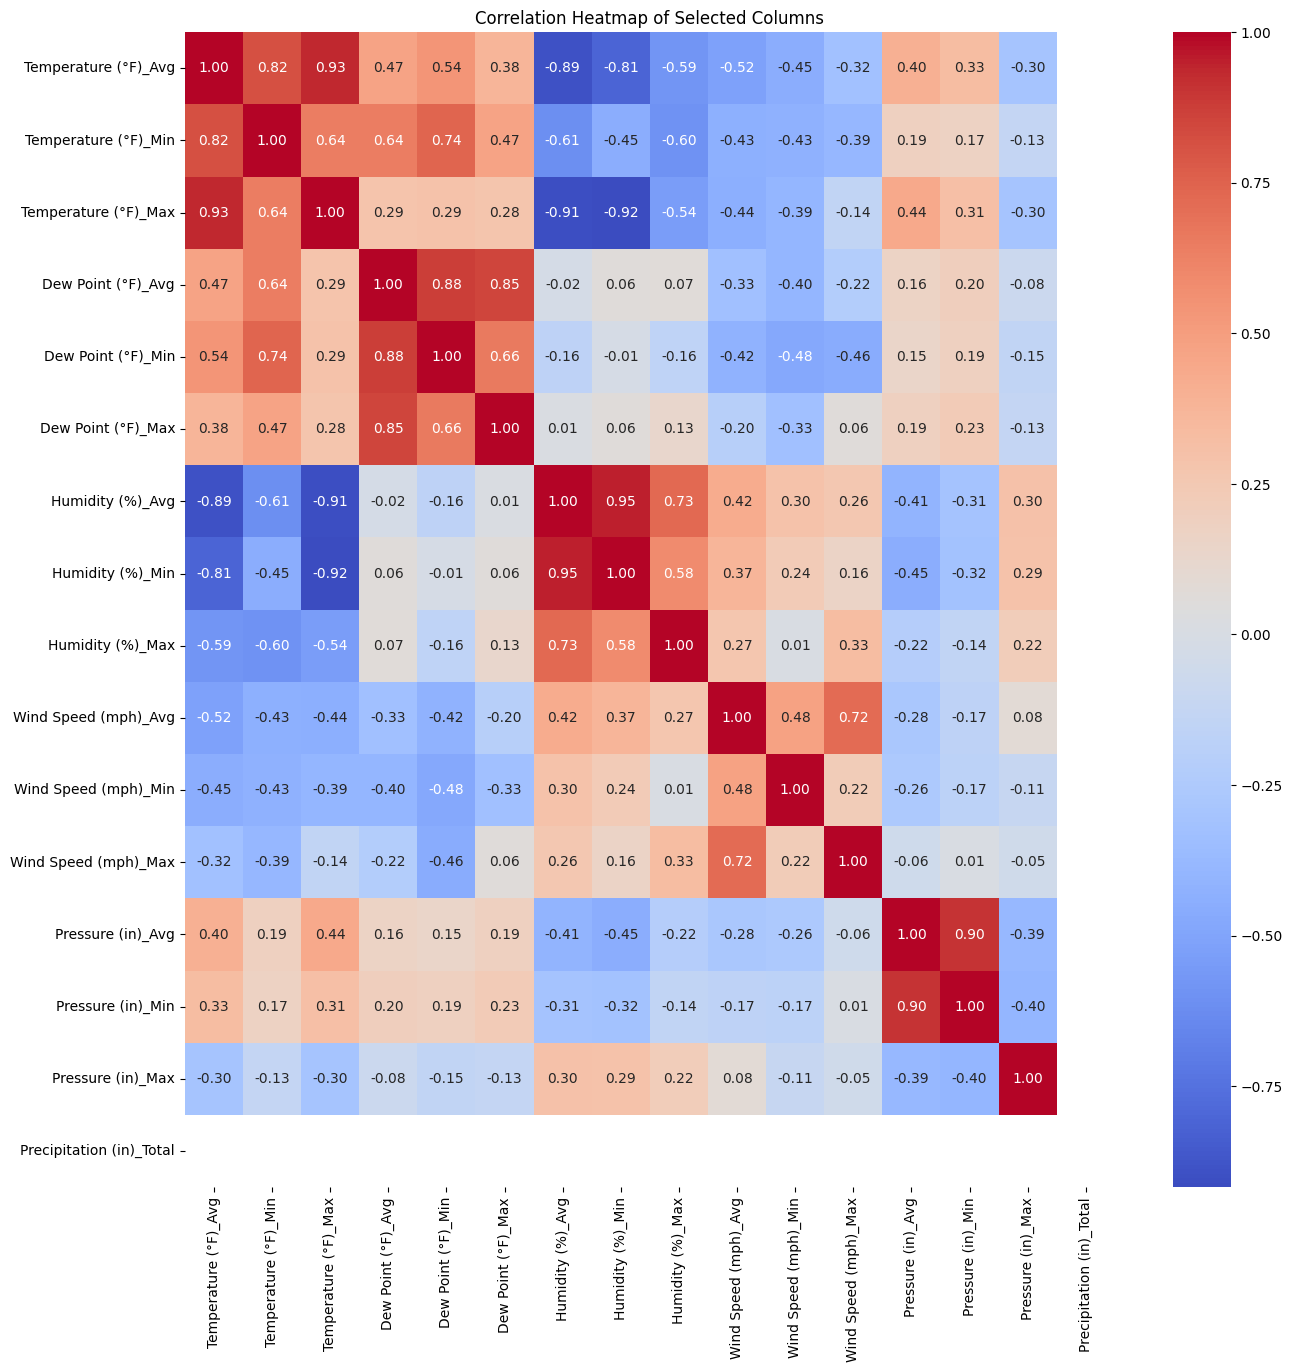

Jul 23


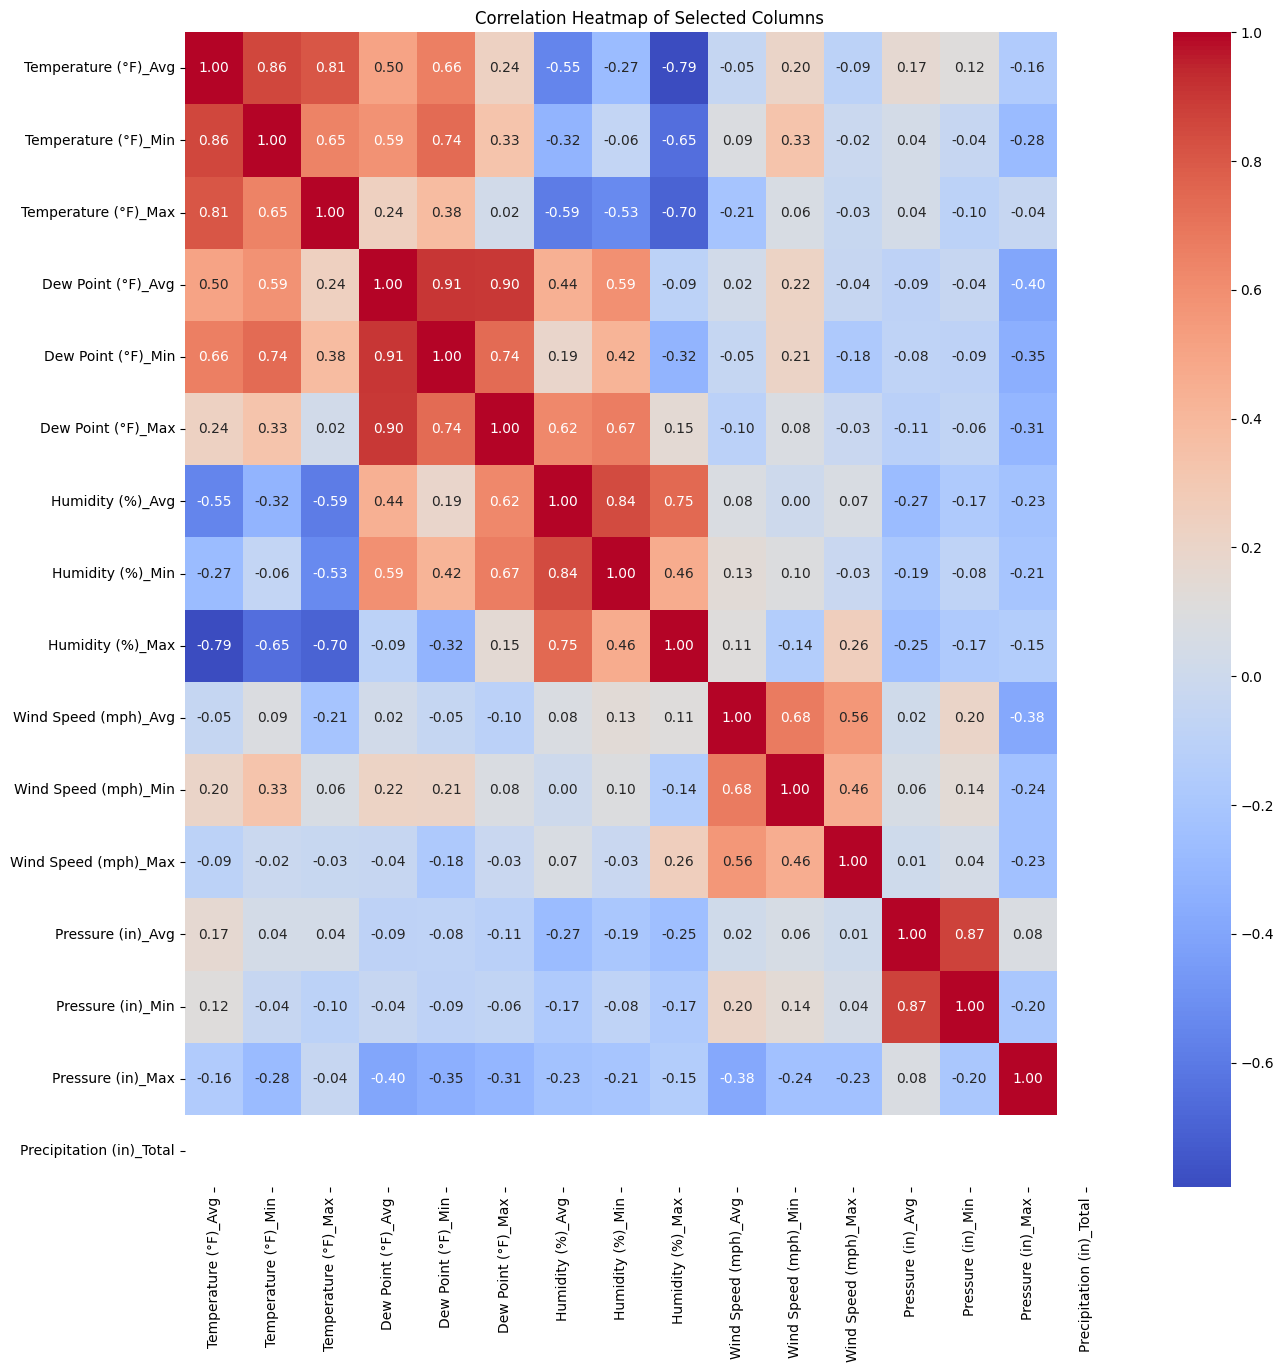

Aug 23


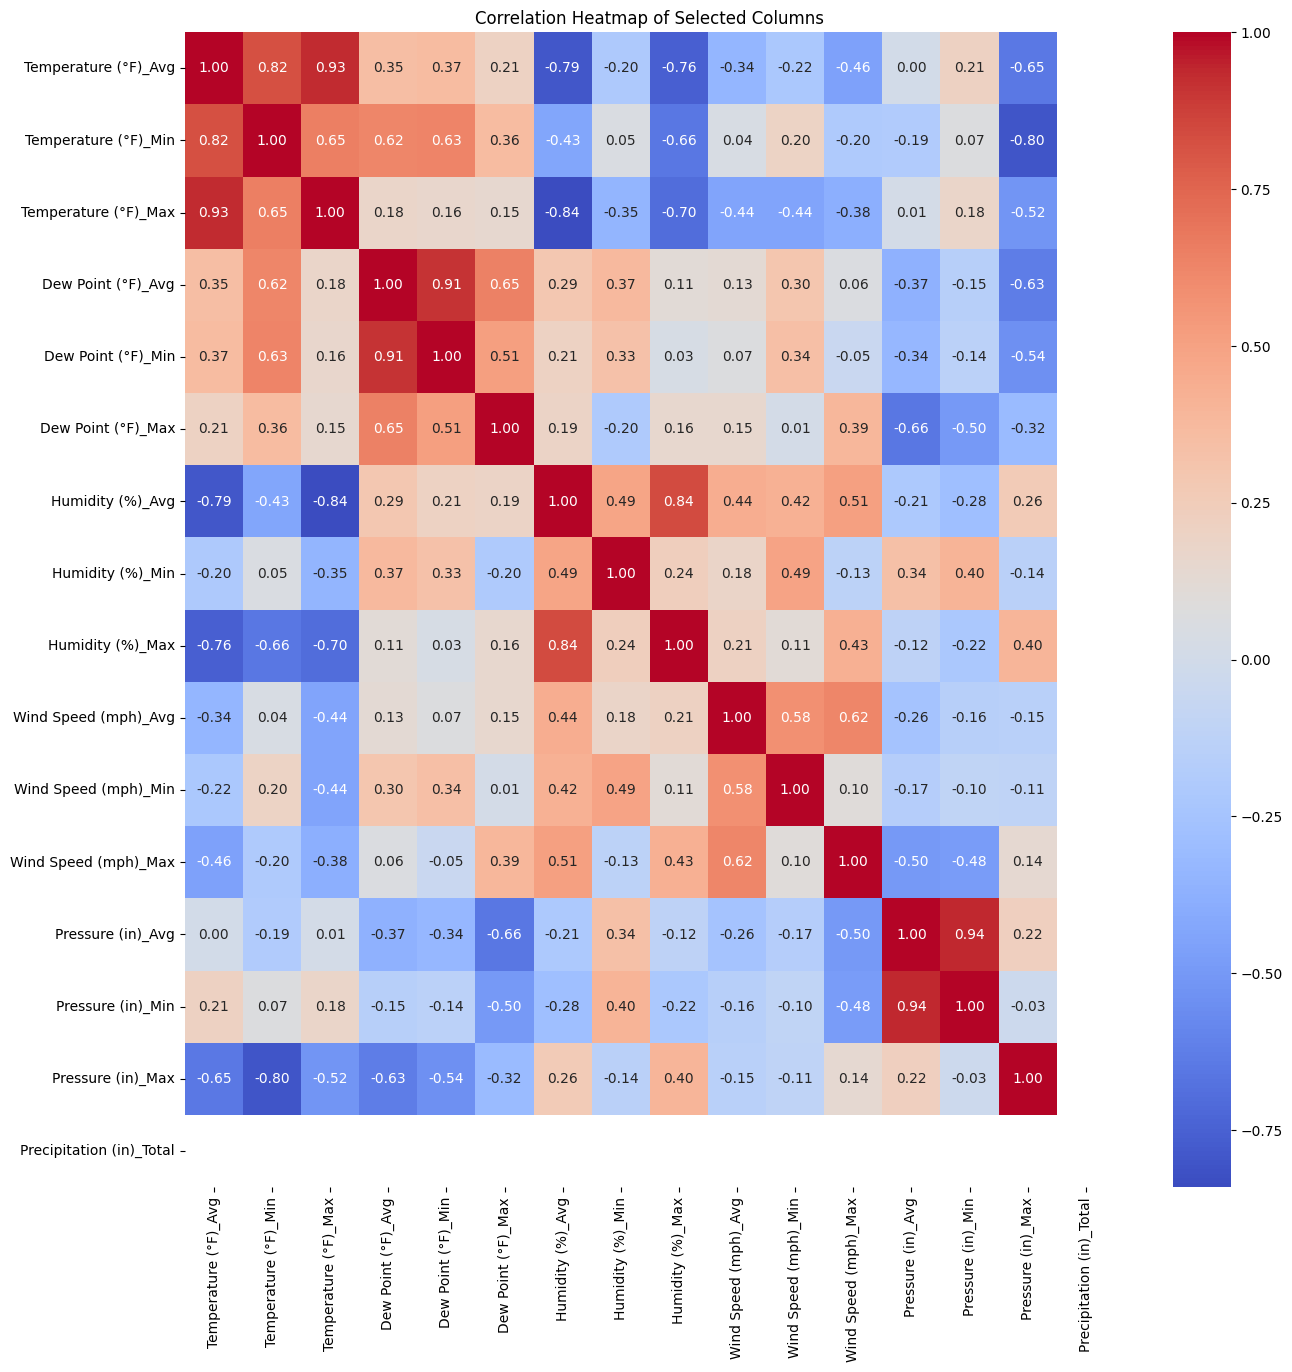

Sep 23


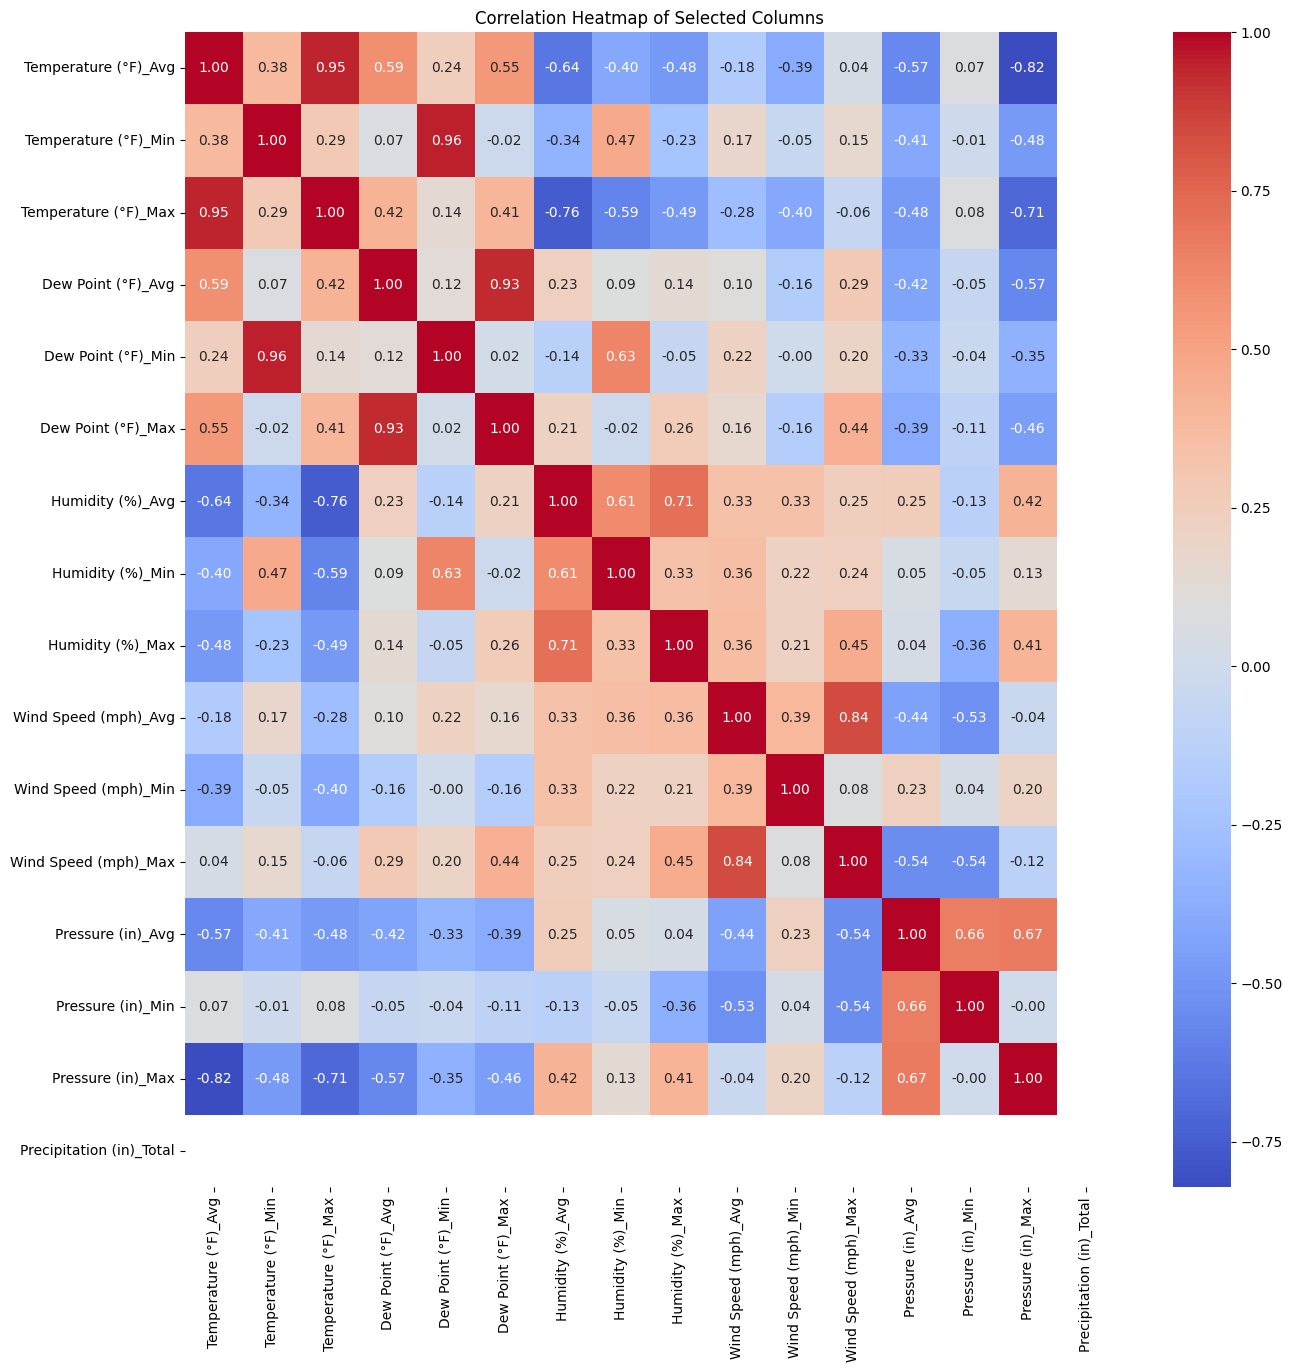

Oct 23


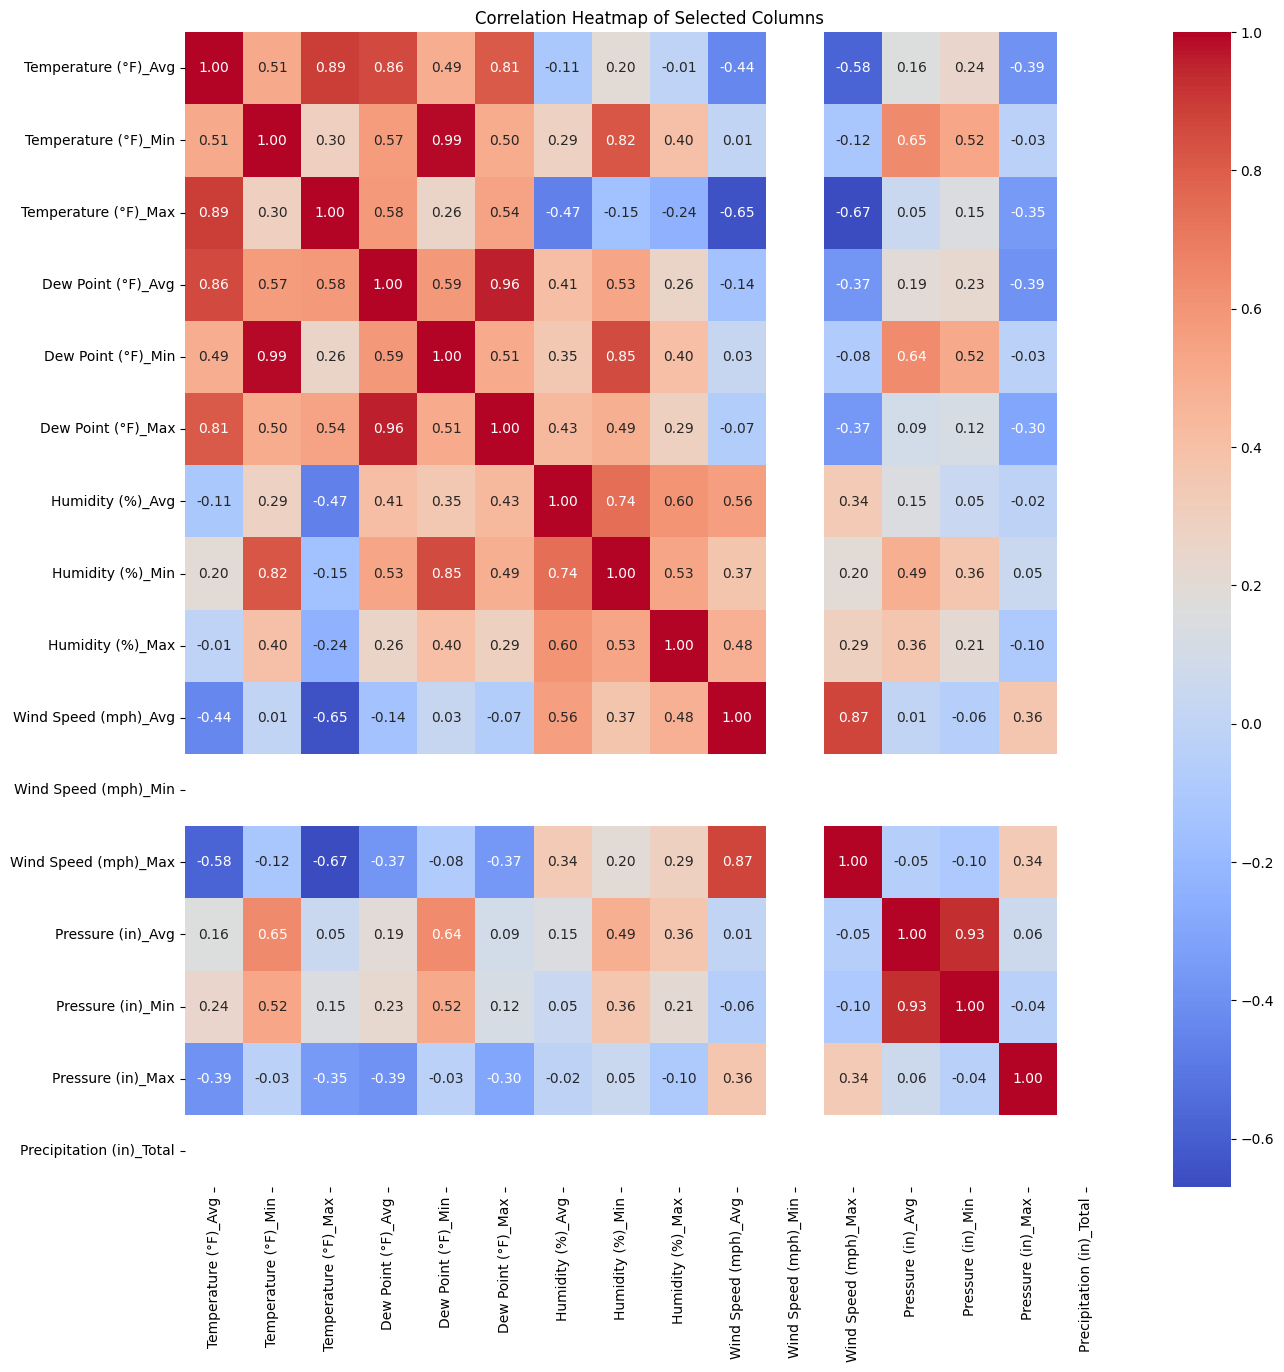

Nov 23


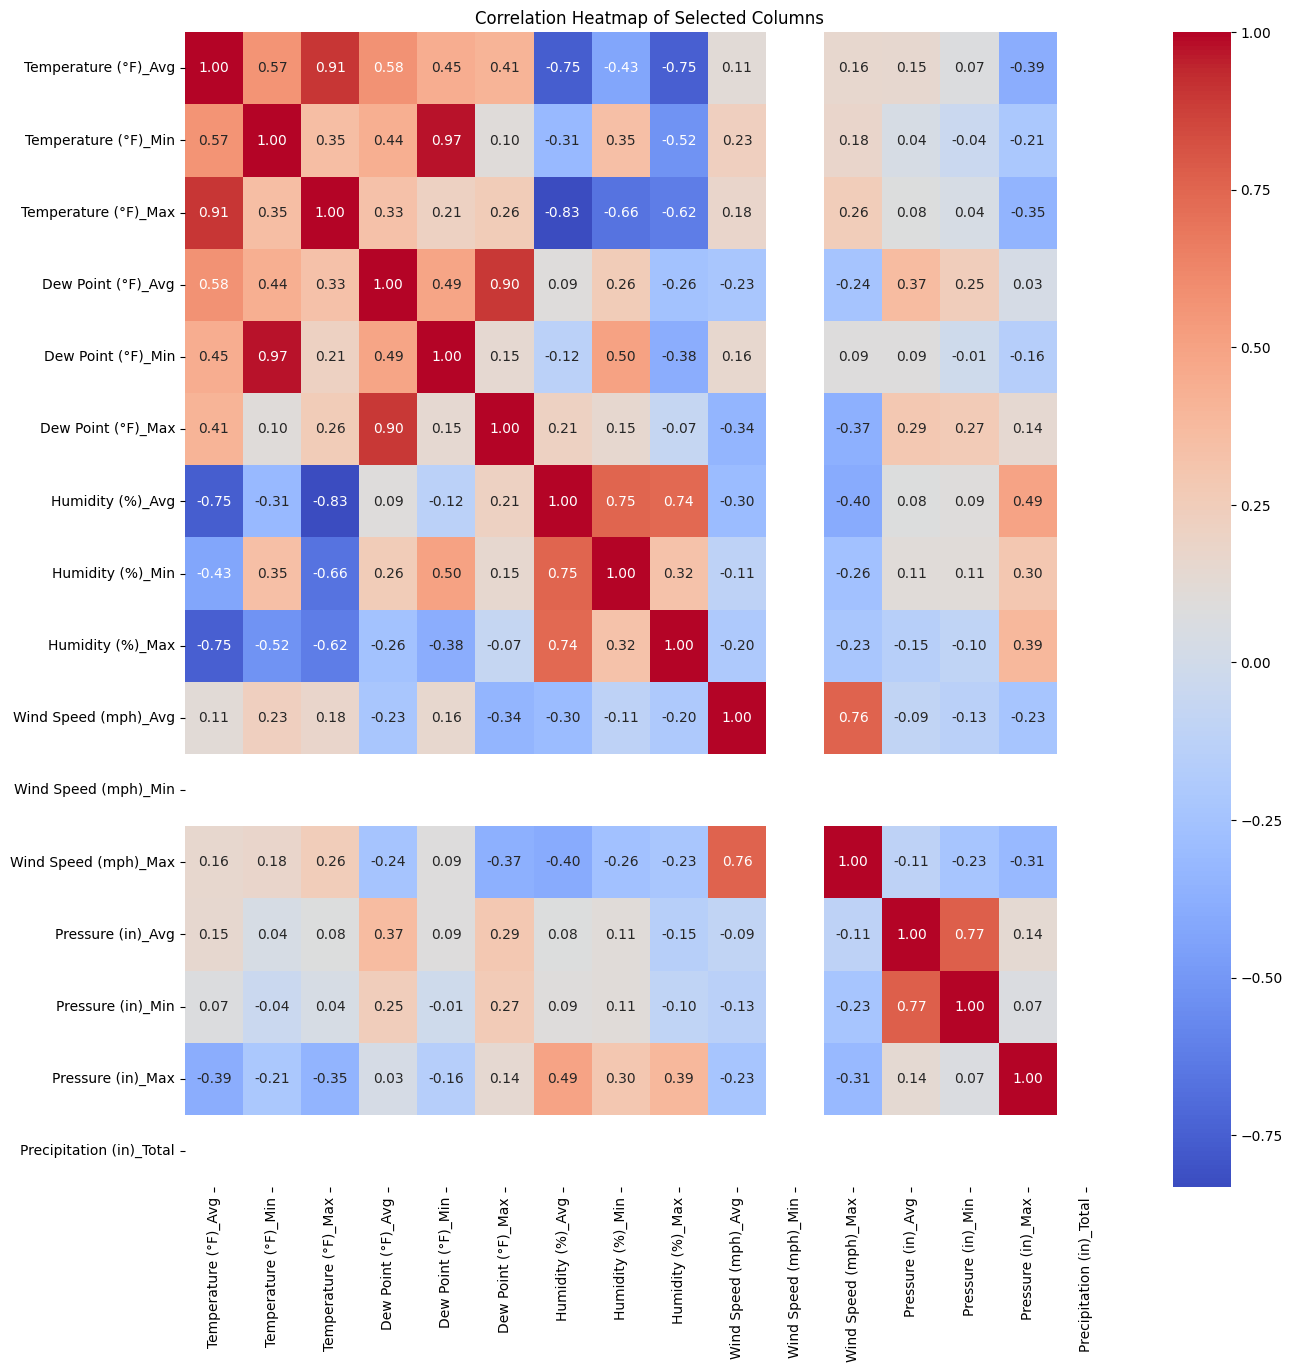

Dec 23


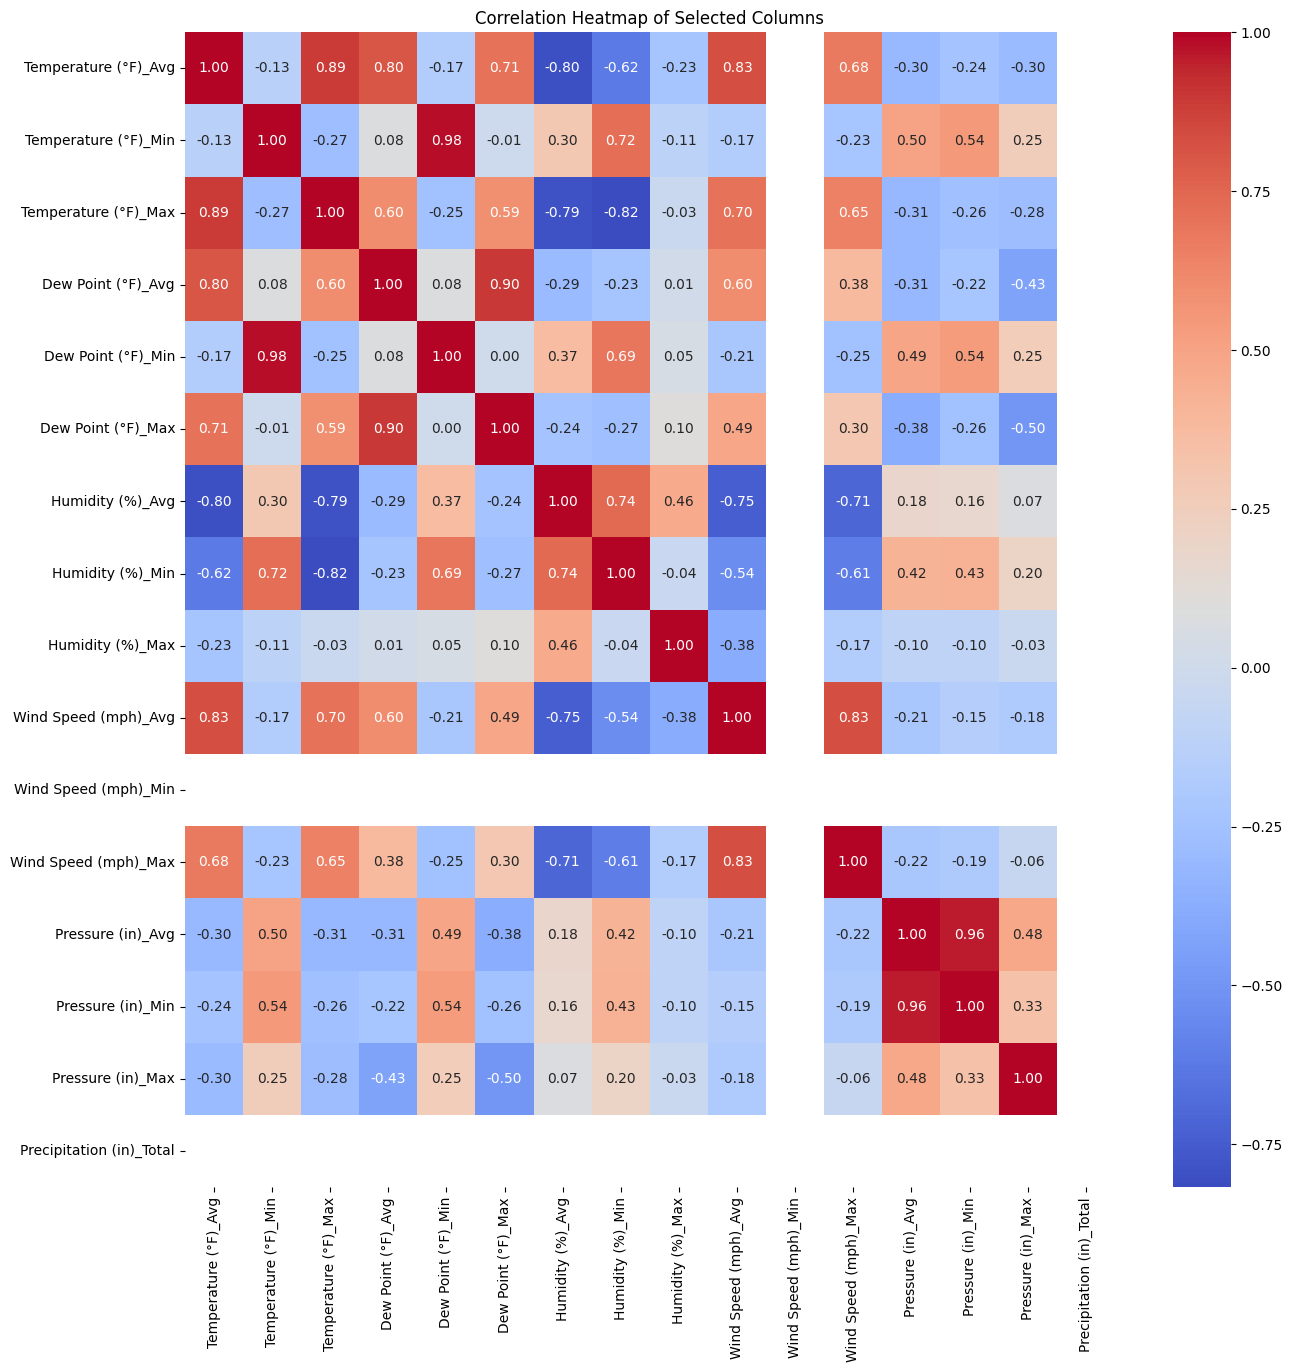

Jan 24


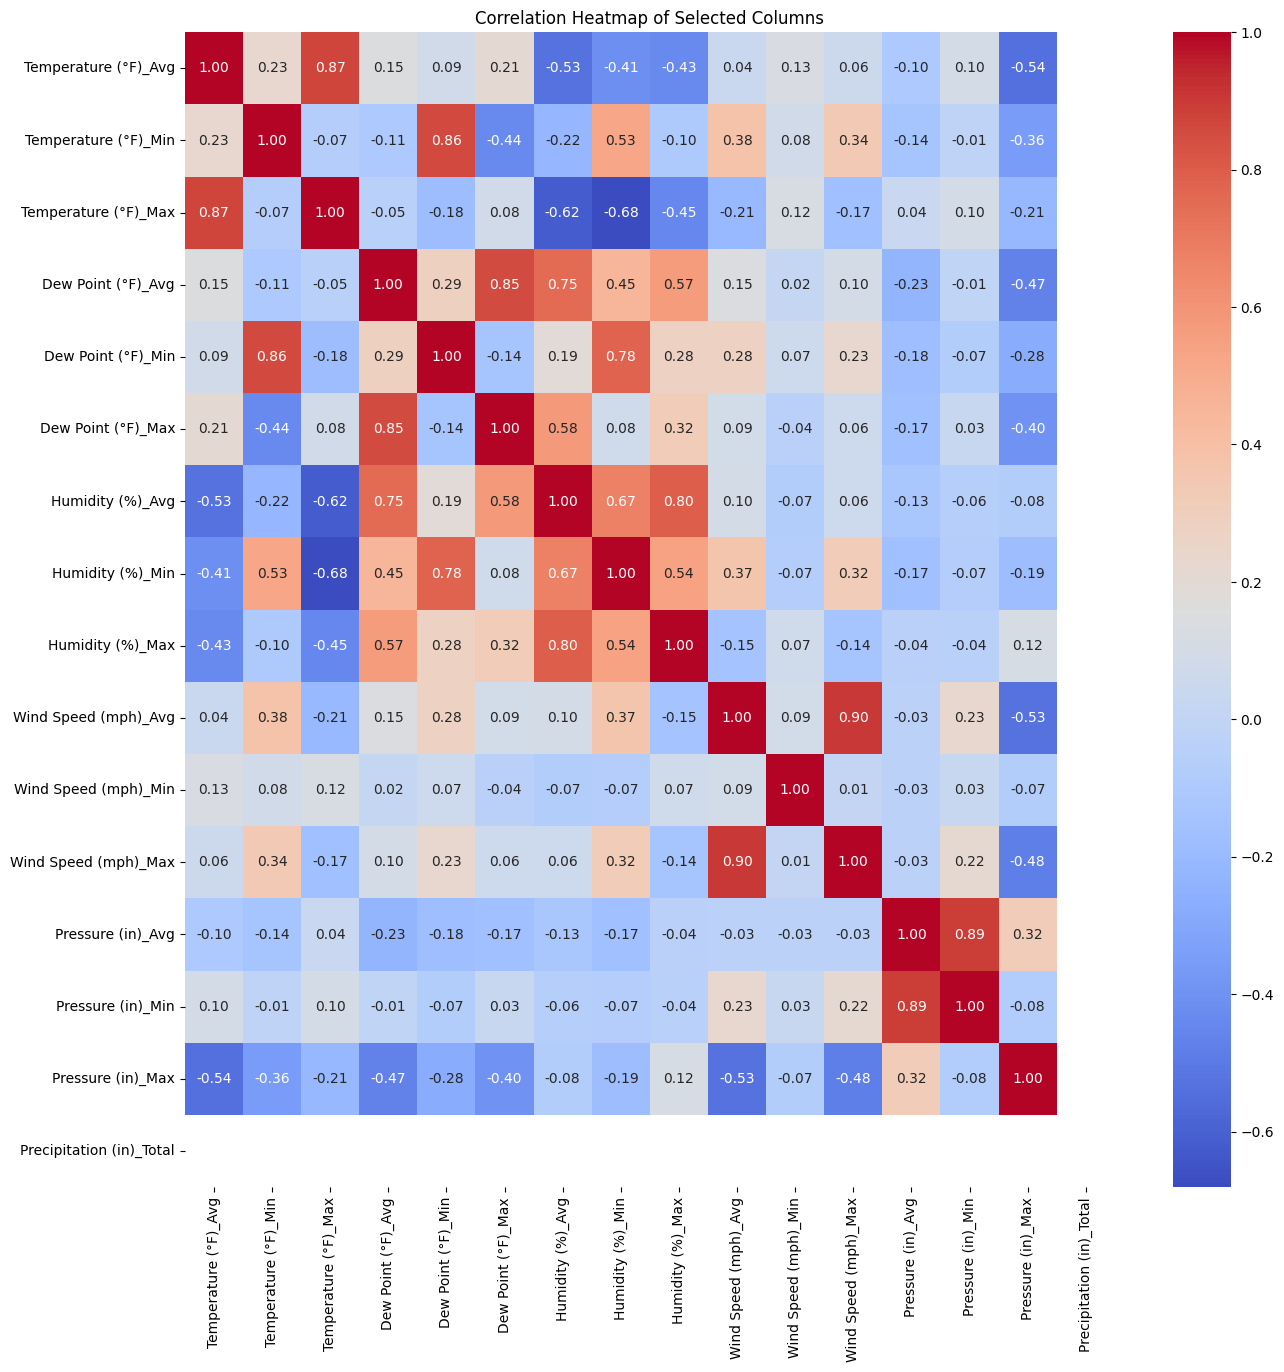

Feb 24


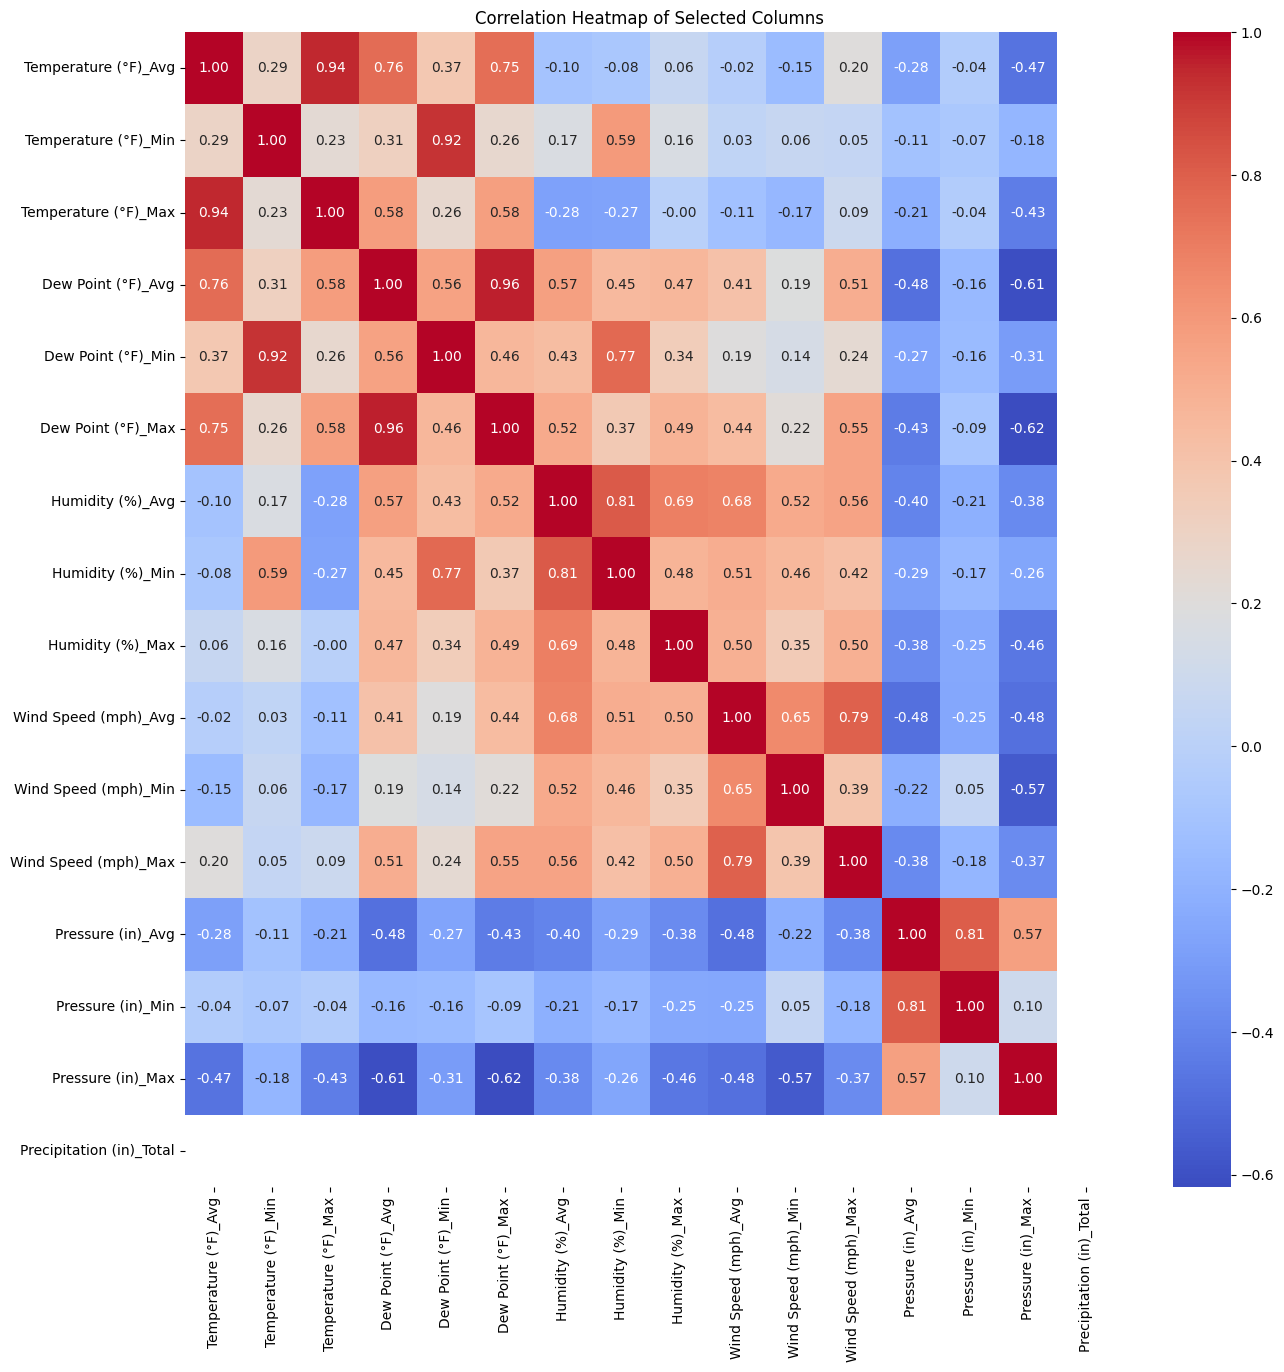

Mar 24


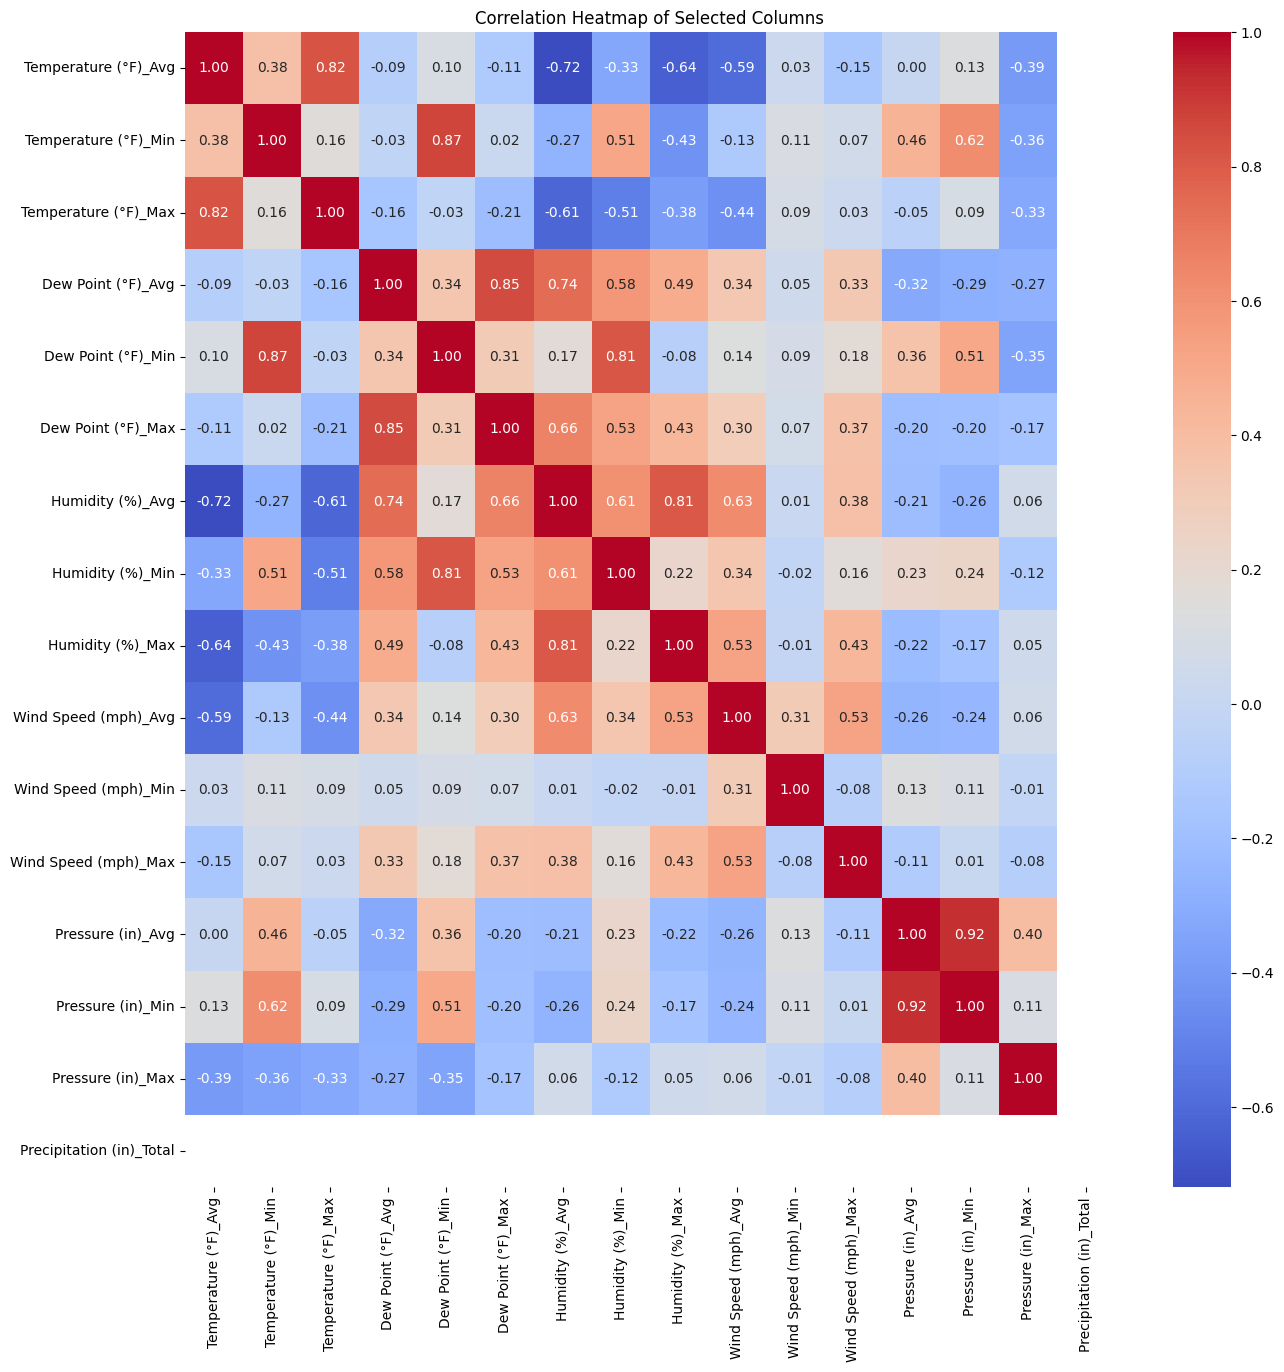

Apr 24


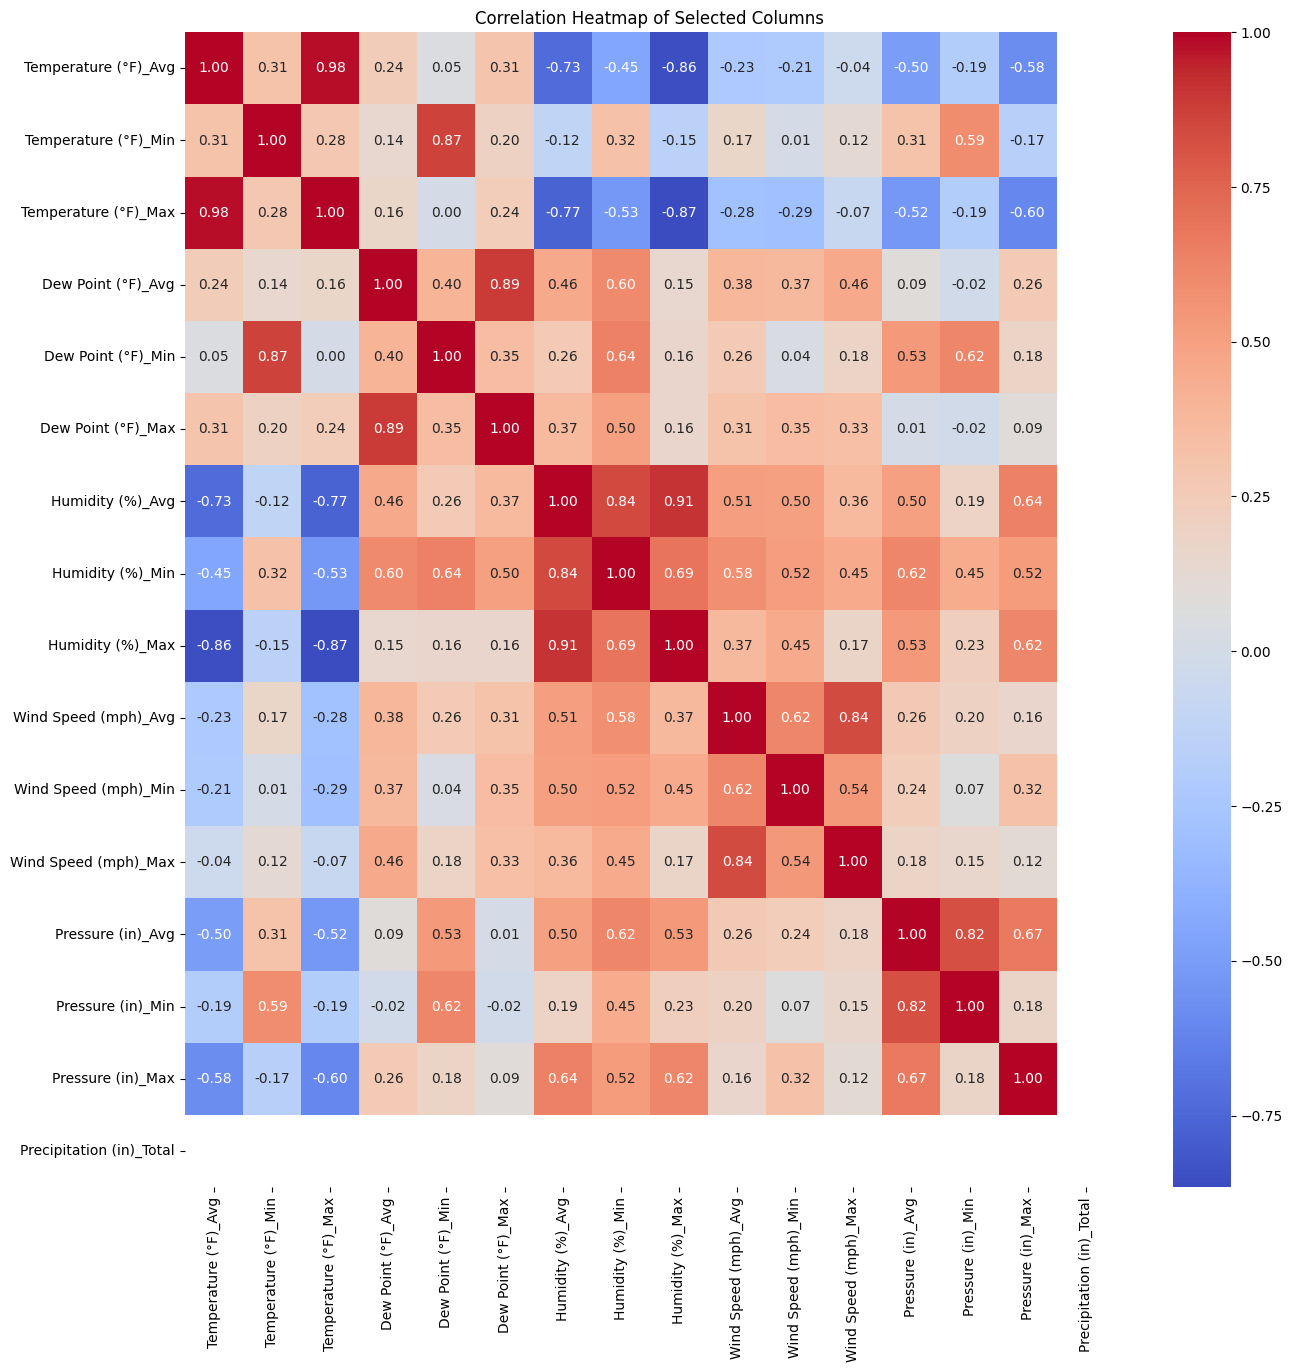

May 24


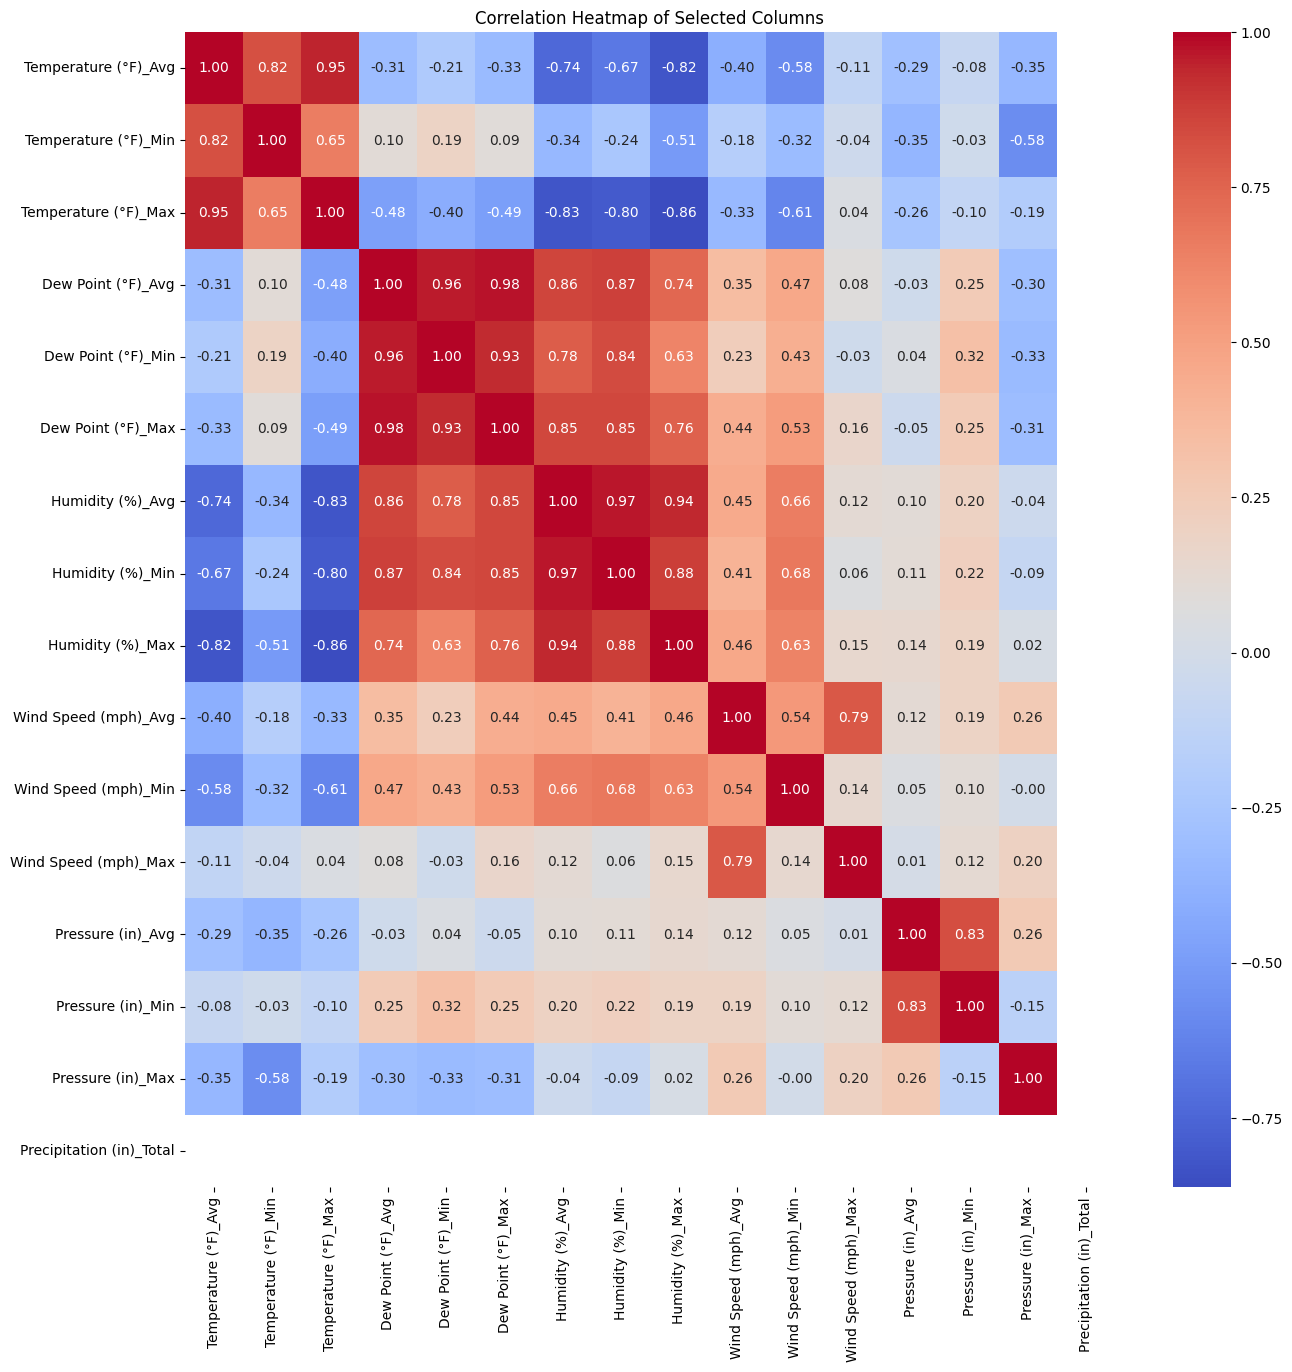

Jun 24


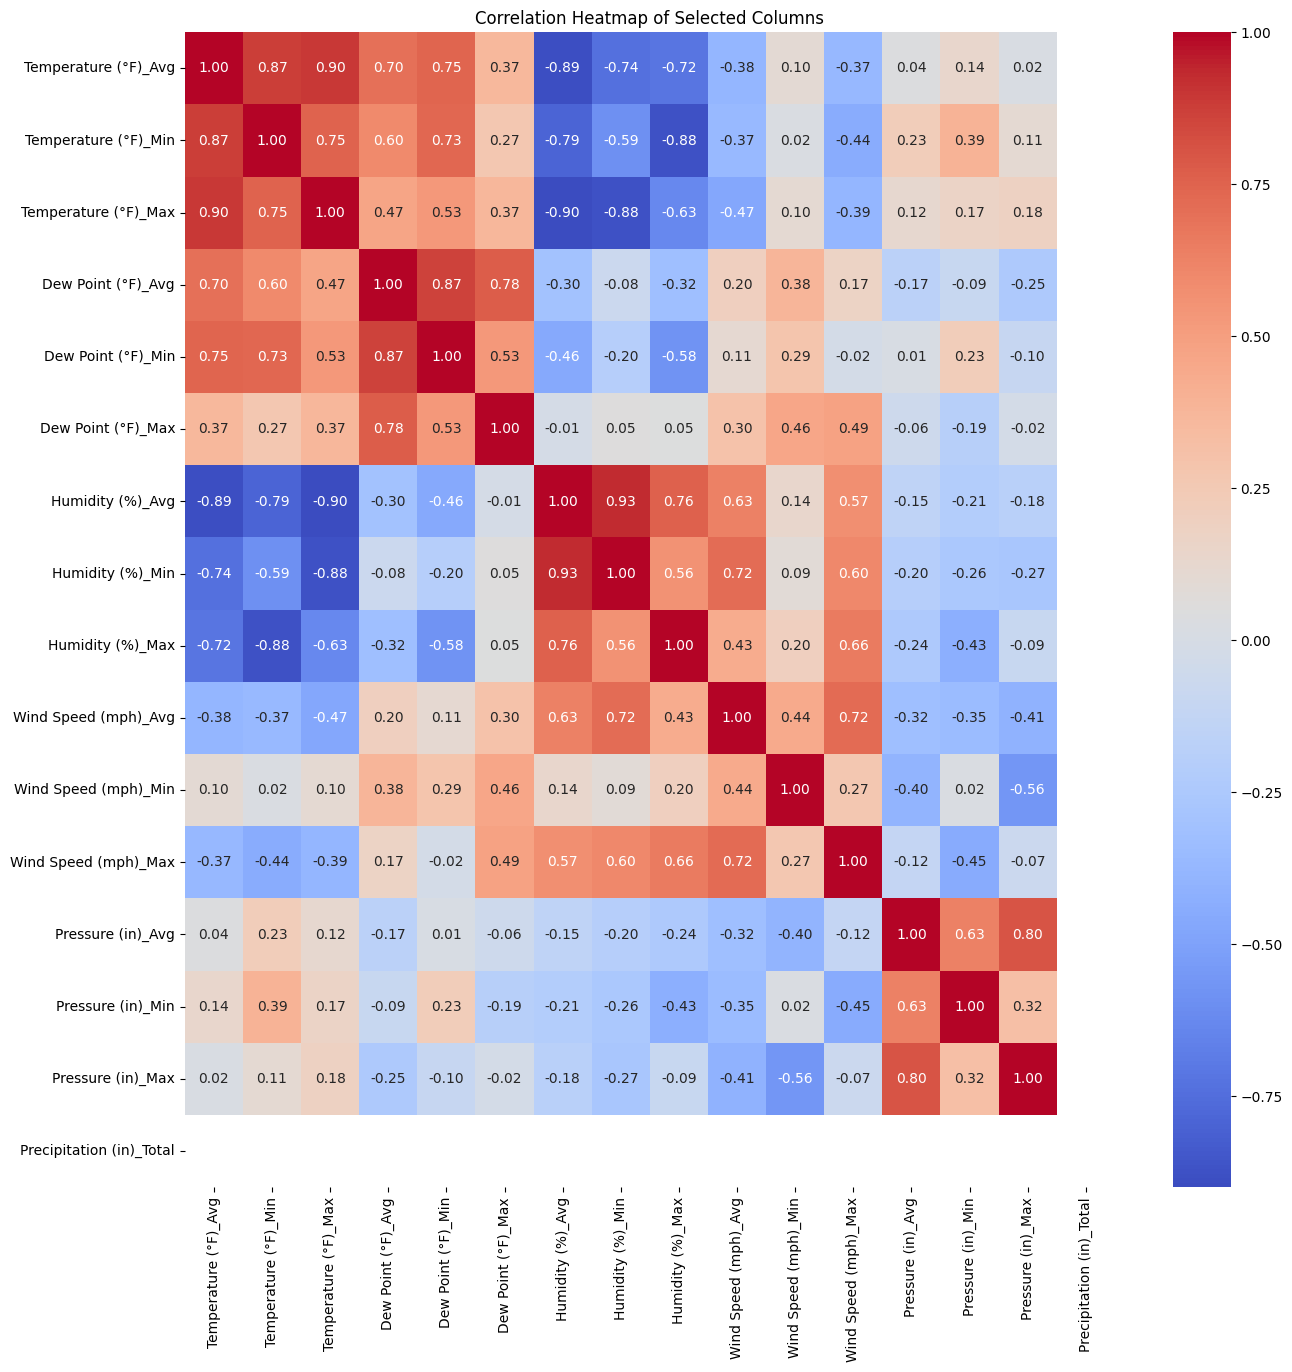

Jul 24


In [192]:

variance = df[columns_to_correlate].var()
print(variance)

plt.figure(figsize=(15, 15))
sns.heatmap(df[columns_to_correlate].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()


year = 23

year = 23

for i in range(1, 14):
    monthly = pd.read_excel(f"ML-Proj-Dataset\\Weather\\{i}.xlsx")
    
    df_time = monthly['Time'].str.split(' ', expand=True).iloc[0].dropna().reset_index(drop=True)

    if i == 7 or i == 20:
        year += 1

    for i in range(1, len(df_time)):
        df_time[i] = f'{df_time[i]}-{df_time[0]}-{year}'

    # Initialize the data dictionary
    columns_to_split = monthly.columns[1:]
    data = {'Time': df_time[1:] }

    # Process the mini columns
    for col in columns_to_split:
        split_data = monthly[col].iloc[0].split(' ')
        
        if split_data[0] in ['Max', 'Total']:
            if split_data[0] == 'Max':  # Max Avg Min
                data[f'{col}_Avg'] = split_data[1::3]
                data[f'{col}_Min'] = split_data[2::3]
                data[f'{col}_Max'] = split_data[3::3]
            elif split_data[0] == 'Total':  # Total
                data[f'{col}_Total'] = split_data[1:]
        else:
            raise ValueError(f"Unexpected header format in column: {col}")
        
    for col in data:
        data[col] = [value for value in data[col] if value not in ['Avg', 'Min']]

    result_df = pd.DataFrame(data)
    
    # Exclude non-numeric columns explicitly, e.g., 'Time'
    result_df = result_df.drop(columns=['Time'])

    # Convert all remaining columns to numeric
    result_df = result_df.apply(pd.to_numeric, errors='coerce')

    # Drop rows or columns with all NaNs, if any
    result_df = result_df.dropna(axis=1, how='all')  # Drop columns with all NaNs
    result_df = result_df.dropna(axis=0, how='all')  # Drop rows with all NaNs

    # Recalculate numeric_cols
    numeric_cols = result_df.select_dtypes(include=['float64', 'int64']).columns

    correlation_matrix = result_df[numeric_cols].corr()
    
    
    # Plot heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap of Selected Columns")
    plt.show()
    
    
    print(df_time[0], year)


### temperature
When considering temperature, there is a high correlation of Max temp with Ave, so drop it
In temperature in 7 out of 13 instances there is a low to no correlation of Min temp with Ave, so keep it for now

### Dew point
Ave is highly correlated to max 12 times 
Max is also highly related to min, but less compared to Ave, so Drop *Ave*

### Humidity
Ave is highly with min and max all the time 
but min is low to no with max, so Drop *AVE*

### Wind speed 
Ave is highly relevant to max but not to min 
Max is even more irrelevant to min compared to Ave, So drop *Ave* 

Also Drop *Temp_Min* as it has a relation of 0.9 with Dew_Min  
and Dew_Min is also more irrelevant compared to other features as compared to Temp_Min

In [193]:

df = df.drop( columns = ['Precipitation (in)_Total', 'Wind Speed (mph)_Max', 'Humidity (%)_Max',
                        'Dew Point (°F)_Max', 'Temperature (°F)_Max', 'Wind Speed (mph)_Min', 'Temperature (°F)_Min'
                        ])


In [194]:
import pandas as pd

def is_delay(scheduled, actual):
    try:
        # Parse only the time portion, ignoring the date part
        scheduled_time = pd.to_datetime(scheduled, format='%H:%M:%S', errors='coerce').time()
        actual_time = pd.to_datetime(actual, format='%H:%M:%S', errors='coerce').time()
        
        # If either time is invalid (NaT), return NaN
        if pd.isna(actual_time):
            return float('nan')
        
        # Compare times: if actual_time is later, it's a delay
        return 1 if actual_time > scheduled_time else 0
    
    except Exception as e:
        print('hi')
        return float('nan')  # Return NaN for unexpected errors

# Apply the delay function
df['is_delay'] = df.apply(lambda row: is_delay(row['departure_scheduledTime'], row['departure_actualTime']) 
                        if pd.notna(row['departure_actualTime']) else float('nan'), axis=1)

# Display the relevant columns
print(df[['departure_scheduledTime', 'departure_actualTime', 'is_delay']].head())


  departure_scheduledTime departure_actualTime  is_delay
0                20:50:00             20:15:00       0.0
1                15:05:00                  NaN       NaN
2                09:50:00                  NaN       NaN
3                23:30:00             23:51:00       1.0
4                11:35:00                  NaN       NaN


In [195]:
df_cleaned = df.dropna(subset=['is_delay'])

In [196]:

weatherCols = [i for i in df_cleaned.columns[40:50]]
weatherCols

['Temperature (°F)_Avg',
 'Dew Point (°F)_Avg',
 'Dew Point (°F)_Min',
 'Humidity (%)_Avg',
 'Humidity (%)_Min',
 'Wind Speed (mph)_Avg',
 'Pressure (in)_Avg',
 'Pressure (in)_Min',
 'Pressure (in)_Max',
 'is_delay']

In [197]:

from sklearn.feature_selection import mutual_info_regression

# Apply mutual information regression
mutual_info = mutual_info_regression(df_cleaned[weatherCols], df_cleaned['is_delay'])

# Output the mutual information values
mutual_info


array([0.01443221, 0.01985665, 0.01098502, 0.0171659 , 0.00424332,
       0.01319268, 0.        , 0.        , 0.00077609, 0.45285556])

In [198]:

from scipy.stats import chi2_contingency

# for i in weatherCols:
chi2, p, dof, expected = chi2_contingency(df_cleaned[ ['Pressure (in)_Max', 'is_delay']])
chi2, p, dof, expected


(np.float64(5165.368261230816),
 np.float64(1.0),
 30989,
 array([[28.09643468,  0.80356532],
        [29.06862965,  0.83137035],
        [29.06862965,  0.83137035],
        ...,
        [28.97141016,  0.82858984],
        [28.87419066,  0.82580934],
        [28.87419066,  0.82580934]]))

In [199]:
# Get the value counts for Dew Point (°F)_Min and is_delay columns
value_counts = df_cleaned[['Pressure (in)_Max', 'is_delay']].value_counts()

# Convert the value counts result to a DataFrame
value_counts_df = value_counts.reset_index(name='count')

# Sort the DataFrame by Dew Point (°F)_Min in descending order
value_counts_df_sorted = value_counts_df.sort_values(by='Pressure (in)_Max', ascending=False)

# Print column names once
print("Pressure (in)_Max   is_delay    count")

# Loop through each row and print the values vertically
for i in range(len(value_counts_df_sorted)):
    print(f"  {value_counts_df_sorted.iloc[i, 0]}              {value_counts_df_sorted.iloc[i, 1]}        {value_counts_df_sorted.iloc[i, 2]}")


Pressure (in)_Max   is_delay    count
  29.5              1.0        257
  29.5              0.0        42
  29.4              1.0        4629
  29.4              0.0        666
  29.3              1.0        3944
  29.3              0.0        696
  29.2              0.0        813
  29.2              1.0        3112
  29.1              0.0        718
  29.1              1.0        2572
  29.0              1.0        3184
  29.0              0.0        696
  28.9              0.0        763
  28.9              1.0        3919
  28.8              1.0        3521
  28.8              0.0        687
  28.7              1.0        433
  28.7              0.0        63
  28.6              1.0        224
  28.6              0.0        51


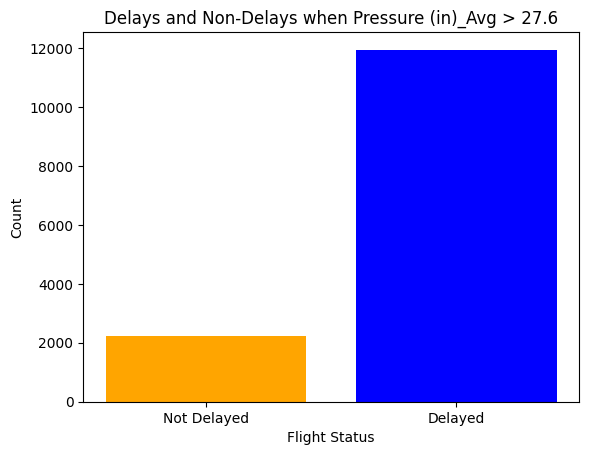

In [200]:
import matplotlib.pyplot as plt

# Filter the data where Pressure (in)_Avg > 27.6
filtered_data = df_cleaned[df_cleaned['Pressure (in)_Max'] >= 29.2]

# Count occurrences of delays and non-delays
delay_counts = filtered_data['is_delay'].value_counts()

# Plot the data
plt.bar(delay_counts.index, delay_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])  # Set x-axis labels
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.title('Delays and Non-Delays when Pressure (in)_Avg > 27.6')
plt.show()


In [201]:
df['Pressure (in)_Max'].value_counts()

Pressure (in)_Max
29.4    9799
28.9    8018
29.3    7660
28.8    7039
29.0    6366
29.2    6073
29.1    4879
28.7     740
29.5     630
28.6     368
Name: count, dtype: int64

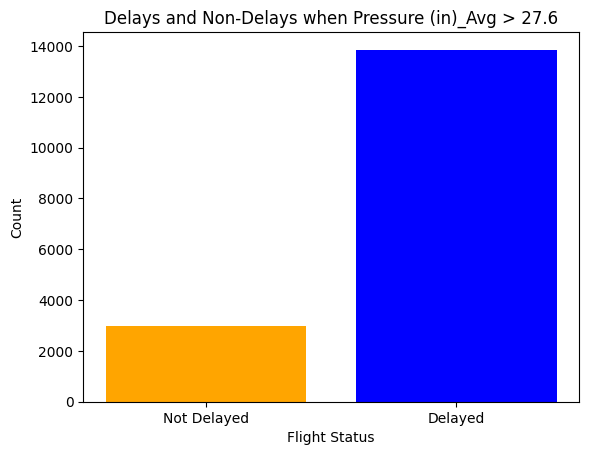

In [202]:
import matplotlib.pyplot as plt

# Filter the data where Pressure (in)_Avg > 27.6
filtered_data = df_cleaned[df_cleaned['Pressure (in)_Max'] < 29.2]

# Count occurrences of delays and non-delays
delay_counts = filtered_data['is_delay'].value_counts()

# Plot the data
plt.bar(delay_counts.index, delay_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])  # Set x-axis labels
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.title('Delays and Non-Delays when Pressure (in)_Avg > 27.6')
plt.show()


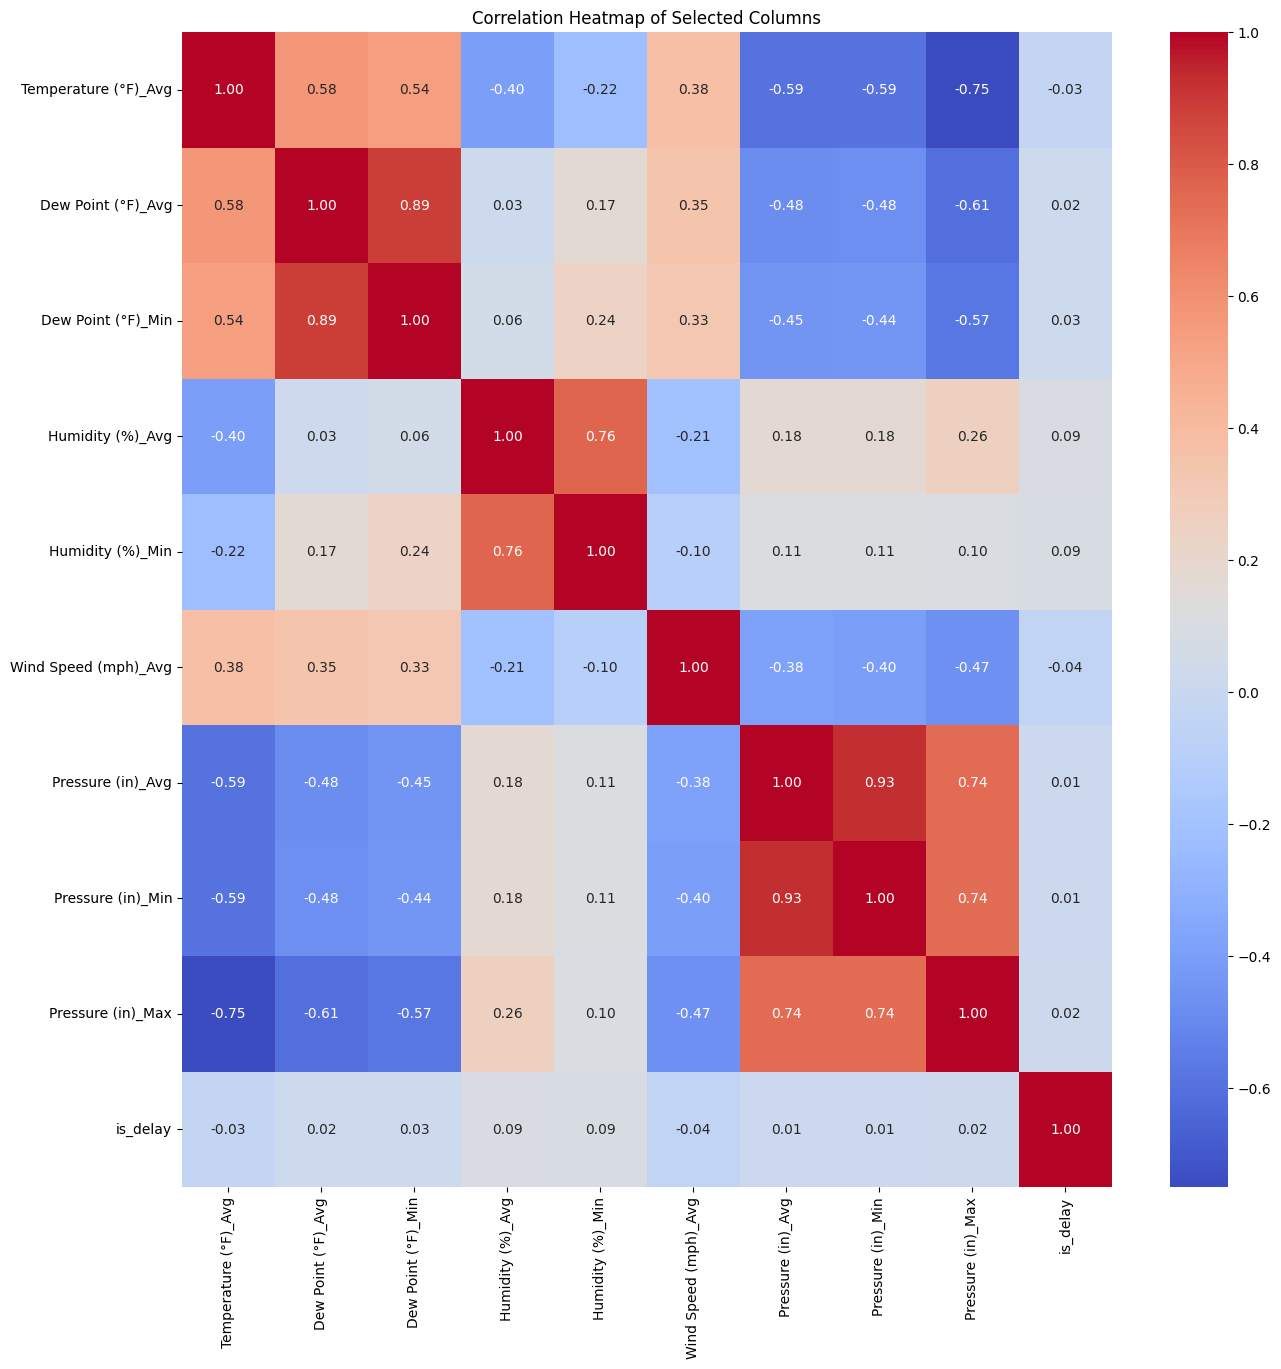

In [203]:

correlation = df[weatherCols].corr(method='kendall')

plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()


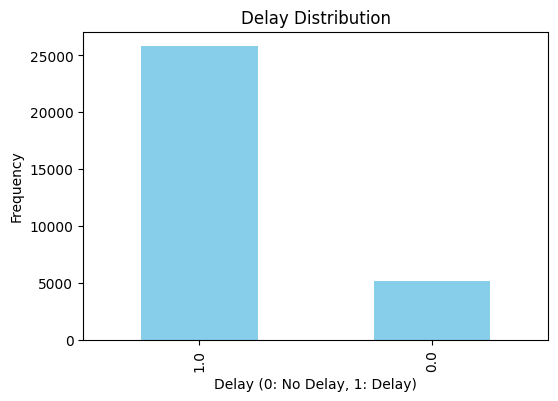

In [204]:

import matplotlib.pyplot as plt

# Get the value counts of the 'is_delay' column
delay_counts = df['is_delay'].value_counts()

# Plot the value counts
plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Delay Distribution')
plt.xlabel('Delay (0: No Delay, 1: Delay)')
plt.ylabel('Frequency')

# Display the plot
plt.show()



In [210]:

not_nan = df[df['departure_actualTime'].notna()]
print( len(not_nan) )
not_nan.head(3)

30990


type  status departure_iataCode departure_icaoCode  \
0   departure  active                lhe               opla   
3   departure  active                lhe               opla   
10  departure  active                lhe               opla   

   departure_terminal departure_scheduledTime  departure_estimatedTime  \
0                   m                20:50:00  2023-07-20t20:00:00.000   
3                   m                23:30:00  2023-07-26t23:30:00.000   
10                NaN                10:45:00  2023-07-24t10:45:00.000   

   departure_actualTime arrival_iataCode arrival_icaoCode arrival_terminal  \
0              20:15:00              ruh             oerk                4   
3              23:51:00              kwi             okkk              NaN   
10             10:54:00              bgw             orbi              NaN   

   arrival_scheduledTime arrival_estimatedTime  \
0               23:20:00              21:54:00   
3               01:30:00              01:24:00   
10              13:10:00              12:44:00   

                       airline_name airline_iataCode airline_icaoCode  \
0                            saudia               sv              sva   
3   pakistan international airlines               pk              pia   
10                      fly baghdad               if              fba   

    flight_number flight_iataNumber flight_icaoNumber arrival_baggage  \
0             737             sv737            sva737             NaN   
3             205             pk205            pia205             NaN   
10            344             if344            fba344             NaN   

   codeshared_airline_name codeshared_airline_iataCode  \
0                      NaN                         NaN   
3                      NaN                         NaN   
10                     NaN                         NaN   

   codeshared_airline_icaoCode  codeshared_flight_number  \
0                          NaN                       NaN   
3                          NaN                       NaN   
10                         NaN                       NaN   

   codeshared_flight_iataNumber codeshared_flight_icaoNumber  \
0                           NaN                          NaN   
3                           NaN                          NaN   
10                          NaN                          NaN   

   arrival_actualTime departure_scheduledDate departure_actualDate  \
0                 NaN              2023-07-20           2023-07-20   
3                 NaN              2023-07-26           2023-07-26   
10                NaN              2023-07-24           2023-07-24   

   departure_estimatedRunwayDate departure_estimatedRunwayTime  \
0                     2023-07-20                      20:15:00   
3                     2023-07-26                      23:51:00   
10                    2023-07-24                      10:54:00   

   departure_actualRunwayDate departure_actualRunwayTime  \
0                  2023-07-20                   20:15:00   
3                  2023-07-26                   23:51:00   
10                 2023-07-24                   10:54:00   

   arrival_scheduledDate arrival_estimatedDate arrival_estimatedRunwayDate  \
0             2023-07-20            2023-07-20                         NaN   
3             2023-07-27            2023-07-27                         NaN   
10            2023-07-24            2023-07-24                         NaN   

   arrival_estimatedRunwayTime arrival_actualRunwayDate  \
0                          NaN                      NaN   
3                          NaN                      NaN   
10                         NaN                      NaN   

   arrival_actualRunwayTime        Time  Temperature (°F)_Avg  \
0                       NaN  2023-07-20                  88.2   
3                       NaN  2023-07-26                  86.9   
10                      NaN  2023-07-24                  87.3   

    Dew Point (°F)_Avg  Dew Po

In [211]:

not_nan['departure_terminal'].unique()


array(['m', nan, 'main', 't1', '1', 'h', 'i'], dtype=object)

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_14764\2239350236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=terminal_counts.index, y=terminal_counts.values, palette='viridis')


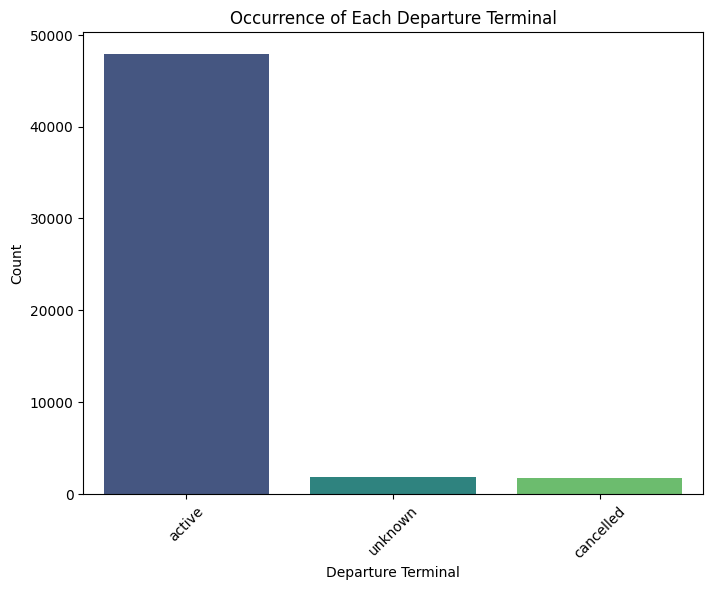

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

terminal_counts = df['status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=terminal_counts.index, y=terminal_counts.values, palette='viridis')
plt.title('Occurrence of Each Departure Terminal')
plt.xlabel('Departure Terminal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_14764\2901952088.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['departure_estimatedTime'] = pd.to_datetime(df['departure_estimatedTime'], errors='coerce')
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_14764\2901952088.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['departure_actualTime'] = pd.to_datetime(df['departure_actualTime'], errors='coerce')
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_14764\2901952088.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_estimatedTime'] = pd.

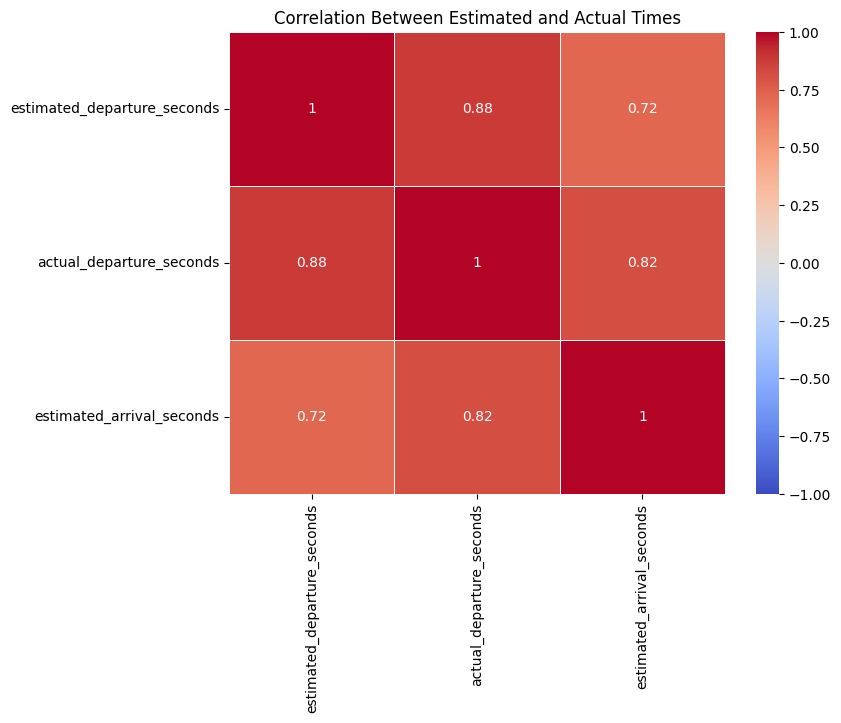

In [ ]:
# Convert time columns to datetime
df['departure_estimatedTime'] = pd.to_datetime(df['departure_estimatedTime'], errors='coerce')
df['departure_actualTime'] = pd.to_datetime(df['departure_actualTime'], errors='coerce')
df['arrival_estimatedTime'] = pd.to_datetime(df['arrival_estimatedTime'], errors='coerce')

# Convert the times to seconds
df['estimated_departure_seconds'] = (df['departure_estimatedTime'] - df['departure_estimatedTime'].min()).dt.total_seconds()
df['actual_departure_seconds'] = (df['departure_actualTime'] - df['departure_actualTime'].min()).dt.total_seconds()
df['estimated_arrival_seconds'] = (df['arrival_estimatedTime'] - df['arrival_estimatedTime'].min()).dt.total_seconds()

# Compute the correlation matrix
corr_matrix = df[['estimated_departure_seconds', 'actual_departure_seconds', 'estimated_arrival_seconds']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Between Estimated and Actual Times')
plt.show()


# Iata and icao relation

In [ ]:
columns = ['departure_iataCode', 'departure_icaoCode', 'arrival_iataCode',
           'arrival_icaoCode', 'airline_iataCode', 'airline_icaoCode', 'flight_iataNumber',
           'flight_icaoNumber', 'codeshared_airline_iataCode', 'codeshared_airline_icaoCode',
           'codeshared_flight_iataNumber', 'codeshared_flight_icaoNumber']

max_widths = {col: max(len(col), df[col].astype(str).map(len).max()) for col in columns}

# Print header
header = "\t".join([col.ljust(max_widths[col]) for col in columns])
print(header)
print("-" * len(header))

count = 0
for i in range( len(df) ):
    count += 1
    row = df.loc[i, columns]
    formatted_row = "\t".join([str(row[col]).ljust(max_widths[col]) for col in columns])
    print(formatted_row)
    
    if count == 100:
        break


departure_iataCode	departure_icaoCode	arrival_iataCode	arrival_icaoCode	airline_iataCode	airline_icaoCode	flight_iataNumber	flight_icaoNumber	codeshared_airline_iataCode	codeshared_airline_icaoCode	codeshared_flight_iataNumber	codeshared_flight_icaoNumber
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
lhe               	opla              	ruh             	oerk            	sv              	sva             	sv737            	sva737           	nan                        	nan                        	nan                         	nan                         
lhe               	opla              	khi             	opkc            	9p              	fjl             	9p843            	fjl843           	nan                        	nan                        	nan                         	nan  

In [ ]:

# because each ica only one iata value 
df = df.drop ( columns = [ 'departure_icaoCode',  'arrival_icaoCode', 'codeshared_airline_iataCode', 'codeshared_flight_iataNumber', 'flight_iataNumber', 'airline_iataCode' ])


In [145]:

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Prevent line wrapping


In [173]:

output_file = "refinedtrain.csv"
df.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")


Data successfully saved to refinedtrain.csv
